In [1]:
import ROOT
from ROOT import gROOT, TString
from ROOT import TCanvas, TLine, TGaxis, TGraph, gPad, TF1, TF2, kRed, TMultiGraph, TLegend, gStyle, TPaveStats, TStyle, TText, TList, TLatex, TGraphErrors, TFile, TTree
import json
import math
from array import array
import numpy as np
import pandas as pd

Welcome to JupyROOT 6.28/06


In [2]:
histFile  = ROOT.TFile.Open("Scans/Scan_005565/Scan005565_HV10_CAEN.root","READ")

In [3]:
sigma_factor = (6.2*10e-3)/1.5

def HVCurrentDataFrame(scanIds):
    current_top = []    
    current_bot = []    
    HV_top = []    
    HV_bot = []
    eff = []
    eff_error = []
    muon_stream = []
    gamma_stream = []
    muon_CS = []
    gamma_CS = []
    muon_CM = []
    gamma_CM = []
    muon_CS_err = []
    gamma_CS_err = []
    muon_CM_err = []
    gamma_CM_err = []
    noiseGammaRate = []
    deltaV_top = []
    deltaV_bot = []
    deltaV_top_err = []
    deltaV_bot_err = []
    for scanId in scanIds:
        !echo "None" >> counter.txt
        !rm counter.txt
        path = "Scans/Scan_00"+str(scanId)+"/*_HV*_CAEN.root"
        !ls {path} >> counter.txt
        counter = np.loadtxt("counter.txt", dtype=str)
        if (str(scanId) == '5634') or (str(scanId) == '5630'):
            print("scanId = ", scanId)
            N = len(counter)
        else:
            N = len(counter)+1
        for i in range(1,N):
            jsonFile = open("Scans/Scan_00"+str(scanId)+"/ANALYSIS/KODELE/HV"+str(i)+"/output.json")
            jsonFile = json.load(jsonFile)
            #print(jsonFile['output_parameters']['efficiencyMuon_corrected'])
            histFile  = ROOT.TFile.Open("Scans/Scan_00"+str(scanId)+"/Scan00"+str(scanId)+"_HV"+str(i)+"_CAEN.root","READ")
            hist_current_bot = histFile.Get("Imon_KODELE-BOT")
            hist_current_top = histFile.Get("Imon_KODELE-TOP")
            hist_HV_bot = histFile.Get("HVeff_KODELE-BOT")
            hist_HV_top = histFile.Get("HVeff_KODELE-TOP")
            #eff.append(jsonFile['output_parameters']['efficiencyMuon_corrected'])
            #eff_error.append((jsonFile['output_parameters']['efficiencyMuon_corrected']*(1-jsonFile['output_parameters']['efficiencyMuon_corrected'])/1000)**0.5)
            eff.append(jsonFile['output_parameters']['efficiencyMuon_corrected'])
            eff_error.append(jsonFile['output_parameters']['efficiencyMuon_corrected_err'])
            muon_stream.append(jsonFile['output_parameters']['muonStreamerProbability'])
            gamma_stream.append(jsonFile['output_parameters']['gammaStreamerProbability'])
            muon_CS.append(jsonFile['output_parameters']['muonCLS'])
            gamma_CS.append(jsonFile['output_parameters']['gammaCLS'])
            muon_CM.append(jsonFile['output_parameters']['muonCMP'])
            gamma_CM.append(jsonFile['output_parameters']['gammaCMP'])
            muon_CS_err.append(jsonFile['output_parameters']['muonCLS_err'])
            gamma_CS_err.append(jsonFile['output_parameters']['gammaCLS_err'])
            muon_CM_err.append(jsonFile['output_parameters']['muonCMP_err'])
            gamma_CM_err.append(jsonFile['output_parameters']['gammaCMP_err'])
            noiseGammaRate.append(jsonFile['output_parameters']['noiseGammaRate'])
            current_bot.append(hist_current_bot.GetMean())
            current_top.append(hist_current_top.GetMean())
            HV_top.append(hist_HV_top.GetMean())
            HV_bot.append(hist_HV_bot.GetMean())
            if (scanId == '5630'):
                deltaV_top.append(0.001)
                deltaV_bot.append(0.001)
            else:
                deltaV_top.append(hist_current_top.GetMean()*1.5)
                deltaV_bot.append(hist_current_bot.GetMean()*1.5)
            deltaV_top_err.append(hist_current_top.GetMean()*6.2*10e-3)
            deltaV_bot_err.append(hist_current_bot.GetMean()*6.2*10e-3)
            histFile.Close()
    DataSet = {'HV_top': HV_top, 
               'HV_bot': HV_bot, 
               'current_top': current_top, 
               'current_bot': current_bot,
               'muon_stream': muon_stream,
               'gamma_stream': gamma_stream,
               'muon_CM': muon_CM,
               'gamma_CM': gamma_CM,
               'muon_CS': muon_CS,
               'gamma_CS': gamma_CS,
               'muon_CM_err': muon_CM_err,
               'gamma_CM_err': gamma_CM_err,
               'muon_CS_err': muon_CS_err,
               'gamma_CS_err': gamma_CS_err,
               'efficiency': eff,
               'eff_error': eff_error,
               'noiseGammaRate': noiseGammaRate,
               'deltaV': (np.array(deltaV_top)*np.array(deltaV_bot)+np.full_like(np.array(deltaV_bot), 0.00000001))/(np.array(deltaV_top)+np.array(deltaV_bot)+np.full_like(np.array(deltaV_bot), 0.00000001)),
               }
    DataSet = pd.DataFrame(data=DataSet)
    DataSet['current'] = DataSet['current_top'] + DataSet['current_bot']
    DataSet['deltaV_err'] = DataSet['deltaV']* sigma_factor *np.sqrt( (1 + (np.sqrt(DataSet['current_top']**2 + DataSet['current_bot']**2 ) / ( DataSet['current_top']+DataSet['current_bot']  ) )**2 ) ) 
    return DataSet
        
#print(HVCurrentDataFrame(5565))
        
#print(hist)
#canvas = ROOT.TCanvas("canvas")
#canvas.cd()
#canvas.SetLogy(True)
#hist.Draw("h")


In [4]:
def FeaturesDataFrame(scanIds):
    current_top = []    
    current_bot = []    
    eff = []
    eff_error = []
    muon_stream = []
    gamma_stream = []
    muon_CS = []
    gamma_CS = []
    muon_CM = []
    gamma_CM = []
    muon_CS_err = []
    gamma_CS_err = []
    muon_CM_err = []
    gamma_CM_err = []
    current_bot = []
    current_top = []
    HV_top = []
    HV_bot = []
    noiseGammaRate = []
    noiseGammaRate_err = []
    for scanId in scanIds:
        #jsonFile = open("Scans/Scan_00"+str(scanIds[scanId][0])+"/ANALYSIS/KODELE/output.json")
        print("scanID: ", scanIds[scanId][0])
        
        direc = ""
        N = "1"
        if (int(scanIds[scanId][0])==5810) or (int(scanIds[scanId][0])==5805) or (int(scanIds[scanId][0])==5820) or (int(scanIds[scanId][0])==5826) or (int(scanIds[scanId][0])==5830) or (int(scanIds[scanId][0])==5827) or (int(scanIds[scanId][0])==5815) or (int(scanIds[scanId][0])==5811):    
            N = "7"
        if (int(scanIds[scanId][0])==5841)or (int(scanIds[scanId][0])==5838) or (int(scanIds[scanId][0])==5840):
            N = "8"
        jsonFile = open("Scans/Scan_00"+str(scanIds[scanId][0])+"/ANALYSIS/KODELE/HV"+str(N)+"/output.json")
        histFile  = ROOT.TFile.Open("Scans/Scan_00"+str(scanIds[scanId][0])+"/Scan00"+str(scanIds[scanId][0])+"_HV"+str(N)+"_CAEN.root","READ")
        hist_current_bot = histFile.Get("Imon_KODELE-BOT")
        hist_current_top = histFile.Get("Imon_KODELE-TOP")
        hist_HV_bot = histFile.Get("HVeff_KODELE-BOT")
        hist_HV_top = histFile.Get("HVeff_KODELE-TOP")
        jsonFile = json.load(jsonFile)
        #jsonFile_fornTrig = json.load(jsonFile_fornTrig)
        nTrig = jsonFile['output_parameters']['nTrig']
        #print(jsonFile['output_parameters']['efficiencyMuon_corrected'])
        eff.append(100*jsonFile['output_parameters']['efficiencyMuon_corrected'])
        eff_error.append(jsonFile['output_parameters']['efficiencyMuon_corrected_err'])
        muon_stream.append(jsonFile['output_parameters']['muonStreamerProbability'])
        gamma_stream.append(jsonFile['output_parameters']['gammaStreamerProbability'])
        muon_CS.append(jsonFile['output_parameters']['muonCLS'])
        gamma_CS.append(jsonFile['output_parameters']['gammaCLS'])
        muon_CM.append(jsonFile['output_parameters']['muonCMP'])
        gamma_CM.append(jsonFile['output_parameters']['gammaCMP'])
        muon_CS_err.append(jsonFile['output_parameters']['muonCLS_err'])
        gamma_CS_err.append(jsonFile['output_parameters']['gammaCLS_err'])
        muon_CM_err.append(jsonFile['output_parameters']['muonCMP_err'])
        gamma_CM_err.append(jsonFile['output_parameters']['gammaCMP_err'])
        noiseGammaRate.append(jsonFile['output_parameters']['noiseGammaRate'])
        noiseGammaRate_err.append(jsonFile['output_parameters']['noiseGammaRate_err'])
        current_bot.append(hist_current_bot.GetMean())
        current_top.append(hist_current_top.GetMean())
        HV_top.append(hist_HV_top.GetMean())
        HV_bot.append(hist_HV_bot.GetMean())
        #print("N: ", N)
        #print("direc: ", direc)
        #print("current: ", hist_current_top.GetMean()+hist_current_bot.GetMean())
        #print("HV: ", hist_HV_top.GetMean())
    DataSet = {'current_top': current_top, 
               'current_bot': current_bot,
               'HV_top': HV_top,
               'HV_bot': HV_bot,
               'muon_stream': muon_stream,
               'gamma_stream': gamma_stream,
               'muon_CM': muon_CM,
               'gamma_CM': gamma_CM,
               'muon_CS': muon_CS,
               'gamma_CS': gamma_CS,
               'muon_CM_err': muon_CM_err,
               'gamma_CM_err': gamma_CM_err,
               'muon_CS_err': muon_CS_err,
               'gamma_CS_err': gamma_CS_err,
               'efficiency': eff,
               'eff_error': eff_error,
               'noiseGammaRate': noiseGammaRate,
               'noiseGammaRate_err': noiseGammaRate_err
              }
        
    DataSet = pd.DataFrame(data=DataSet)
    DataSet['current'] = DataSet['current_top'] + DataSet['current_bot']
    
    return DataSet
        
#print(HVCurrentDataFrame(5565))
        
#print(hist)
#canvas = ROOT.TCanvas("canvas")
#canvas.cd()
#canvas.SetLogy(True)
#hist.Draw("h")


In [5]:
sigmoid1 = TF1("sigmoid1","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid1.SetParNames("Emax","Lambda","HV50")
sigmoid1.SetParameters(0.9, 0.01, 7000)
sigmoid2 = TF1("sigmoid2","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid2.SetParNames("Emax","Lambda","HV50")
sigmoid2.SetParameters(0.9, 0.01, 7000)
sigmoid3 = TF1("sigmoid3","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid3.SetParNames("Emax","Lambda","HV50")
sigmoid3.SetParameters(0.9, 0.01, 7000)
sigmoid4 = TF1("sigmoid4","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid4.SetParNames("Emax","Lambda","HV50")
sigmoid4.SetParameters(0.9, 0.01, 7000)
sigmoid5 = TF1("sigmoid5","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid5.SetParNames("Emax","Lambda","HV50")
sigmoid5.SetParameters(0.9, 0.001, 7000)
sigmoid6 = TF1("sigmoid6","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid6.SetParNames("Emax","Lambda","HV50")
sigmoid6.SetParameters(0.9, 0.01, 7000)
sigmoid7 = TF1("sigmoid7","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid7.SetParNames("Emax","Lambda","HV50")
sigmoid7.SetParameters(0.9, 0.01, 7000)
sigmoid8 = TF1("sigmoid8","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid8.SetParNames("Emax","Lambda","HV50")
sigmoid8.SetParameters(0.9, 0.01, 7000)
sigmoid9 = TF1("sigmoid9","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid9.SetParNames("Emax","Lambda","HV50")
sigmoid9.SetParameters(0.9, 0.001, 7000)
sigmoid10 = TF1("sigmoid10","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid10.SetParNames("Emax","Lambda","HV50")
sigmoid10.SetParameters(0.9, 0.01, 7000)
sigmoid11 = TF1("sigmoid11","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid11.SetParNames("Emax","Lambda","HV50")
sigmoid11.SetParameters(0.9, 0.0001, 11000)
sigmoid12 = TF1("sigmoid12","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid12.SetParNames("Emax","Lambda","HV50")
sigmoid12.SetParameters(0.9, 0.01, 7000)
sigmoid13 = TF1("sigmoid13","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid13.SetParNames("Emax","Lambda","HV50")
sigmoid13.SetParameters(0.9, 0.01, 7000)
sigmoid14 = TF1("sigmoid14","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid14.SetParNames("Emax","Lambda","HV50")
sigmoid14.SetParameters(0.9, 0.001, 7000)
sigmoid15 = TF1("sigmoid15","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid15.SetParNames("Emax","Lambda","HV50")
sigmoid15.SetParameters(0.9, 0.001, 7000)
sigmoid16 = TF1("sigmoid16","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid16.SetParNames("Emax","Lambda","HV50")
sigmoid16.SetParameters(0.9, 0.01, 7000)
sigmoid17 = TF1("sigmoid17","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid17.SetParNames("Emax","Lambda","HV50")
sigmoid17.SetParameters(0.9, 0.01, 7000)
sigmoid18 = TF1("sigmoid18","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid18.SetParNames("Emax","Lambda","HV50")
sigmoid18.SetParameters(0.9, 0.01, 7000)
sigmoid19 = TF1("sigmoid19","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid19.SetParNames("Emax","Lambda","HV50")
sigmoid19.SetParameters(0.9, 0.001, 7000)
sigmoid20 = TF1("sigmoid20","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))")
sigmoid20.SetParNames("Emax","Lambda","HV50")
sigmoid20.SetParameters(0.9, 0.001, 7000)

In [6]:
scans = {'30CO2_OFF': ['5627'],
         '30CO2_22':  ['5659'],
         '30CO2_10':  ['5675'],
         '30CO2_6.9': ['5621'],
         '30CO2_4.6': ['5623'],
         '30CO2_3.3': ['5622', '5625'],
         '30CO2_2.2': ['5827'],
         '30CO2_1': ['5820'],
         '30CO205SF6_OFF': ['5712'],
         '30CO205SF6_22':  ['5706'],
         '30CO205SF6_10':  ['5707'],
         '30CO205SF6_6.9': ['5708'],
         '30CO205SF6_4.6': ['5709'],
         '30CO205SF6_3.3': ['5713'],
         '30CO205SF6_2.2': ['5840'],
         '30CO205SF6_1': ['5838'],
         '40CO2_OFF': ['5612'],
         '40CO2_22':  ['5615'],
         '40CO2_10':  ['5614'],
         '40CO2_6.9': ['5616'],
         '40CO2_4.6': ['5613'],
         '40CO2_3.3': ['5611'],
         'STDMX_OFF': ['5809'],
         'STDMX_22':  ['5632'],
         'STDMX_10':  ['5631'],
         'STDMX_6.9': ['5633'],
         'STDMX_4.6': ['5630'],
         'STDMX_3.3': ['5629'],
         'STDMX_2.2': ['5805'],
         'STDMX_1': ['5810']
         }
Scans_30CO2 = {'30CO2_OFF': ['5819'],
         '30CO2_22':  ['5826'],
         '30CO2_10':  ['5832'], #HV7
         '30CO2_6.9': ['5830'], #HV7
         '30CO2_4.6': ['5831'],
         '30CO2_3.3': ['5822'],
         '30CO2_2.2': ['5827'], #HV7
         '30CO2_1': ['5820'] #HV7
         }
Scans_40CO2 = {'40CO2_OFF': ['5845'],
         '40CO2_22':  ['5846'],
         '40CO2_10':  ['5844'],
         '40CO2_6.9': ['5843'],
         '40CO2_4.6': ['5842'],
         '40CO2_3.3': ['5841'] # HV8
         }
Scans_STDMX = {'STDMX_OFF': ['5808'],
         'STDMX_22':  ['5813'],
         'STDMX_10':  ['5815'], #HV7
         'STDMX_6.9': ['5811'], #HV7 
         'STDMX_4.6': ['5807'],
         'STDMX_3.3': ['5814'],
         'STDMX_2.2': ['5805'], #HV7
         'STDMX_1': ['5810'], #HV7
         }
Scans_30CO205SF6 = {'30CO205SF6_OFF': ['5833'],
         '30CO205SF6_22':  ['5839'],
         '30CO205SF6_10':  ['5836'],
         '30CO205SF6_6.9': ['5837'],
         '30CO205SF6_4.6': ['5835'],
         '30CO205SF6_3.3': ['5834'],
         '30CO205SF6_2.2': ['5838'], #HV7
         '30CO205SF6_1': ['5840']} #HV7
scans_STDMX = [
         ['STDMX_OFF', sigmoid1, 6, 23],
         ['STDMX_22', sigmoid2, 3, 22],
         ['STDMX_4.6', sigmoid3, 1, 34],
         ['STDMX_3.3', sigmoid4, 2, 20],
         ['STDMX_1', sigmoid5, 4, 21],
         ]
scans_30CO2 = [
         ['30CO2_OFF', sigmoid6, 6, 23],
         ['30CO2_22', sigmoid7, 3, 22],
         ['30CO2_4.6', sigmoid8, 1, 34],
         ['30CO2_3.3', sigmoid9, 2, 20],
         ['30CO2_1', sigmoid10, 4, 21],
         ]
scans_30CO205SF6 = [
         ['30CO205SF6_OFF', sigmoid16, 6, 23],
         ['30CO205SF6_10', sigmoid17, 3, 22],
         ['30CO205SF6_4.6', sigmoid18, 1, 34],
         ['30CO205SF6_2.2', sigmoid19, 2, 20],
         ['30CO205SF6_1', sigmoid20, 4, 21],
         ]
scans_40CO2 = [
         ['40CO2_OFF', sigmoid11, 6, 23],
         ['40CO2_22', sigmoid12, 3, 22],
         ['40CO2_10', sigmoid13, 1, 34],
         ['40CO2_4.6', sigmoid14, 2, 20],
         ['40CO2_3.3', sigmoid15, 4, 21],
         ]

In [7]:
for scan in scans:
    print(scan, ': ')
    print(HVCurrentDataFrame(scans[scan]))

30CO2_OFF : 
    HV_top  HV_bot  current_top  current_bot  muon_stream  gamma_stream  \
0   6000.0  6000.0     0.000000     0.000000     0.000000      0.000000   
1   6100.0  6100.0     0.000000     0.000000     0.000000      0.000000   
2   6200.0  6200.0     0.000000     0.000000     0.000000      0.000000   
3   6300.0  6300.0     0.000000     0.000000     0.000000      0.000000   
4   6400.0  6400.0     0.000000     0.000000     0.000487      0.000000   
5   6500.0  6500.0     0.000000     0.000000     0.000741      0.000000   
6   6600.0  6600.0     0.000000     0.000000     0.002092      0.000000   
7   6700.0  6700.0     0.000000     0.000000     0.002620      0.000000   
8   6800.0  6800.0     0.000000     0.000000     0.003935      0.000050   
9   6900.0  6900.0     0.000000     0.000000     0.007948      0.000000   
10  7000.0  7000.0     0.002920     0.000000     0.011996      0.000099   
11  7100.0  7100.0     0.006515     0.004235     0.013567      0.000000   
12  7200.0  

In [8]:
Features_STDMX = FeaturesDataFrame(Scans_STDMX)
Features_STDMX['gamma_CM'][0] = 1
Features_STDMX['gamma_CS'][0] = 1
Features_STDMX['noiseGammaRate'][0] = 1
print("Features_STDMX = ", Features_STDMX)

scanID:  5808
scanID:  5813
scanID:  5815
scanID:  5811
scanID:  5807
scanID:  5814
scanID:  5805
scanID:  5810
Features_STDMX =     current_top  current_bot  HV_top  HV_bot  muon_stream  gamma_stream  \
0     0.662577     0.579678  7250.0  7250.0     0.021638      0.000510   
1     7.331106     6.235990  7250.0  7250.0     0.020339      0.009124   
2    12.528288    10.652905  7200.0  7200.0     0.013753      0.013070   
3    18.163424    15.603424  7200.0  7200.0     0.018294      0.017172   
4    25.579945    21.916266  7250.0  7250.0     0.020365      0.028520   
5    38.579806    33.307197  7250.0  7250.0     0.016467      0.040073   
6    45.416834    38.666666  7200.0  7200.0     0.012542      0.035533   
7    86.239032    73.963387  7200.0  7200.0     0.009771      0.050569   

    muon_CM   gamma_CM   muon_CS  gamma_CS  muon_CM_err  gamma_CM_err  \
0  1.056347   1.000000  2.149189  1.000000     0.128334      0.049051   
1  1.077432   1.858821  2.121014  1.854984     0.120719  

In [9]:
Features_30CO2 = FeaturesDataFrame(Scans_30CO2)
Features_30CO2['gamma_CM'][0] = 1
Features_30CO2['gamma_CS'][0] = 1
Features_30CO2['noiseGammaRate'][0] = 1
print("FeaturesDataFrame(Scans_30CO2) = ", FeaturesDataFrame(Scans_30CO2))

scanID:  5819
scanID:  5826
scanID:  5832
scanID:  5830
scanID:  5831
scanID:  5822
scanID:  5827
scanID:  5820
scanID:  5819
scanID:  5826
scanID:  5832
scanID:  5830
scanID:  5831
scanID:  5822
scanID:  5827
scanID:  5820
FeaturesDataFrame(Scans_30CO2) =     current_top  current_bot  HV_top  HV_bot  muon_stream  gamma_stream  \
0     0.516166     0.416491  7060.0  7060.0     0.018003      0.000250   
1     8.236441     7.194407  7100.0  7100.0     0.019441      0.008320   
2    14.676590    12.431754  7060.0  7060.0     0.018289      0.012954   
3    22.606310    19.578012  7100.0  7100.0     0.017575      0.023247   
4    27.569545    23.575042  7060.0  7060.0     0.015897      0.023081   
5    42.202164    36.301476  7060.0  7060.0     0.016532      0.034044   
6    86.810166    75.809578  7100.0  7100.0     0.014368      0.058803   
7   106.863310    93.091297  7100.0  7100.0     0.012289      0.066622   

    muon_CM   gamma_CM   muon_CS  gamma_CS  muon_CM_err  gamma_CM_err  \
0 

In [10]:
Features_30CO205SF6 = FeaturesDataFrame(Scans_30CO205SF6)
Features_30CO205SF6['gamma_CM'][0] = 1
Features_30CO205SF6['gamma_CS'][0] = 1
Features_30CO205SF6['noiseGammaRate'][0] = 1
print("FeaturesDataFrame(Scans_30CO205SF6) = ", FeaturesDataFrame(Scans_30CO205SF6))

scanID:  5833
scanID:  5839
scanID:  5836
scanID:  5837
scanID:  5835
scanID:  5834
scanID:  5838
scanID:  5840
scanID:  5833
scanID:  5839
scanID:  5836
scanID:  5837
scanID:  5835
scanID:  5834
scanID:  5838
scanID:  5840
FeaturesDataFrame(Scans_30CO205SF6) =     current_top  current_bot  HV_top  HV_bot  muon_stream  gamma_stream  \
0     0.729052     0.573356  6950.0  6950.0     0.023953      0.000650   
1     9.885142     8.778891  7060.0  7060.0     0.035393      0.017356   
2    17.803002    15.848965  7060.0  7060.0     0.028751      0.031319   
3    25.854911    22.977375  7060.0  7060.0     0.030122      0.042524   
4    33.528084    30.002467  7060.0  7060.0     0.030221      0.054032   
5    50.053757    44.876121  7060.0  7060.0     0.023795      0.072797   
6   110.092891    98.324803  7000.0  7000.0     0.017995      0.098907   
7    58.901701    52.498809  7000.0  7000.0     0.020767      0.073303   

    muon_CM   gamma_CM   muon_CS  gamma_CS  muon_CM_err  gamma_CM_err 

In [11]:
Features_40CO2 = FeaturesDataFrame(Scans_40CO2)
Features_40CO2['gamma_CM'][0] = 1
Features_40CO2['gamma_CS'][0] = 1
Features_40CO2['noiseGammaRate'][0] = 1
print("FeaturesDataFrame(Scans_40CO2) = ", FeaturesDataFrame(Scans_40CO2))

scanID:  5845
scanID:  5846
scanID:  5844
scanID:  5843
scanID:  5842
scanID:  5841
scanID:  5845
scanID:  5846
scanID:  5844
scanID:  5843
scanID:  5842
scanID:  5841
FeaturesDataFrame(Scans_40CO2) =     current_top  current_bot  HV_top  HV_bot  muon_stream  gamma_stream  \
0     0.908333     0.675833  7000.0  7000.0     0.023776      0.000225   
1     9.063140     7.805416  7000.0  7000.0     0.024847      0.011061   
2    17.024096    15.139259  7000.0  7000.0     0.025918      0.020561   
3    24.642144    21.794923  7000.0  7000.0     0.023344      0.028155   
4    32.087562    28.356041  7000.0  7000.0     0.023924      0.034470   
5    47.500257    42.183781  7000.0  7000.0     0.023465      0.048381   

    muon_CM  gamma_CM   muon_CS  gamma_CS  muon_CM_err  gamma_CM_err  \
0  1.048760  1.361280  2.379098  1.416013     0.162951      0.035061   
1  1.071192  1.867909  2.307964  1.979245     0.156078      0.150436   
2  1.097243  2.926823  2.257545  1.950481     0.150126      0.2

Info in <TCanvas::Print>: png file current.png has been created


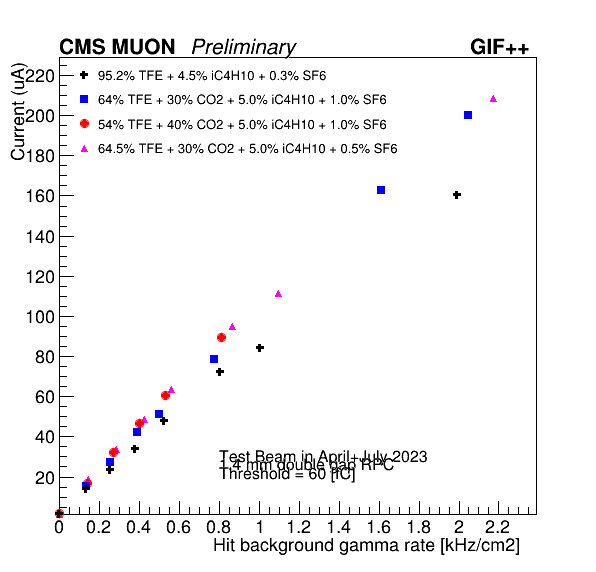

In [12]:
canvas = TCanvas("c", "c", 564, 232, 600, 600)
        
_40CO2 = TGraphErrors(6, 
                   Features_40CO2['noiseGammaRate'].values/(Features_40CO2['gamma_CS'].values*1000), 
                   Features_40CO2['current'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2.SetMarkerColor(2)
_40CO2.SetMarkerStyle(20)

_30CO2 = TGraphErrors(8, 
                   Features_30CO2['noiseGammaRate'].values/(Features_30CO2['gamma_CS'].values*1000), 
                   Features_30CO2['current'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2.SetMarkerColor(4)
_30CO2.SetMarkerStyle(21)

_30CO205SF6 = TGraphErrors(8, 
                   Features_30CO205SF6['noiseGammaRate'].values/(Features_30CO205SF6['gamma_CS'].values*1000), 
                   Features_30CO205SF6['current'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6.SetMarkerColor(6)
_30CO205SF6.SetMarkerStyle(22)

STDMX = TGraphErrors(8, 
                   Features_STDMX['noiseGammaRate'].values/(Features_STDMX['gamma_CS'].values*1000), 
                   Features_STDMX['current'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
STDMX.SetMarkerColor(1)
STDMX.SetMarkerStyle(34)

_30CO205SF6.SetTitle("")
_30CO205SF6.GetXaxis().SetTitle("Hit background gamma rate [kHz/cm2]")
_30CO205SF6.GetYaxis().SetTitle("Current (uA)")
_30CO205SF6.GetYaxis().SetTitleOffset(1.2)
_30CO205SF6.Draw("AP")
_40CO2.Draw("PSAME")
_30CO2.Draw("PSAME")
STDMX.Draw("PSAME")

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.12, 0.72, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.025); 
legend.AddEntry(STDMX, "95.2% TFE + 4.5% iC4H10 + 0.3% SF6", "P");
legend.AddEntry(_30CO2, "64% TFE + 30% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_40CO2, "54% TFE + 40% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_30CO205SF6, "64.5% TFE + 30% CO2 + 5.0% iC4H10 + 0.5% SF6", "P");
legend.Draw();

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.03);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(0.8, 27, "Test Beam in April+July 2023");
ltx_data.DrawLatex(0.8, 23, "1.4 mm double gap RPC");
ltx_data.DrawLatex(0.8, 19, "Threshold = 60 [fC]")
ltx_data.Draw()

canvas.Draw()
canvas.SaveAs("current.png")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file density_current.png has been created
Info in <TCanvas::Print>: pdf file density_current.pdf has been created


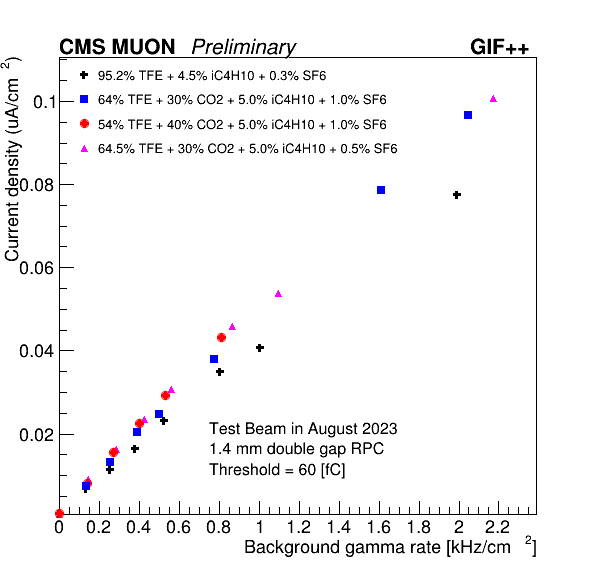

In [13]:
canvas = TCanvas("c", "c", 564, 232, 600, 600)
        
_40CO2 = TGraphErrors(6, 
                   Features_40CO2['noiseGammaRate'].values/(Features_40CO2['gamma_CS'].values*1000), 
                   Features_40CO2['current'].values/2070.5,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2.SetMarkerColor(2)
_40CO2.SetMarkerStyle(20)

_30CO2 = TGraphErrors(8, 
                   Features_30CO2['noiseGammaRate'].values/(Features_30CO2['gamma_CS'].values*1000), 
                   Features_30CO2['current'].values/2070.5,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2.SetMarkerColor(4)
_30CO2.SetMarkerStyle(21)

_30CO205SF6 = TGraphErrors(8, 
                   Features_30CO205SF6['noiseGammaRate'].values/(Features_30CO205SF6['gamma_CS'].values*1000), 
                   Features_30CO205SF6['current'].values/2070.5,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6.SetMarkerColor(6)
_30CO205SF6.SetMarkerStyle(22)

STDMX = TGraphErrors(8, 
                   Features_STDMX['noiseGammaRate'].values/(Features_STDMX['gamma_CS'].values*1000), 
                   Features_STDMX['current'].values/2070.5,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
STDMX.SetMarkerColor(1)
STDMX.SetMarkerStyle(34)

_30CO205SF6.SetTitle("")
_30CO205SF6.GetXaxis().SetTitle("Background gamma rate [kHz/cm^{2}]")
_30CO205SF6.GetYaxis().SetTitle("Current density (uA/cm^{2})")
_30CO205SF6.GetYaxis().SetTitleOffset(1.45)
_30CO205SF6.GetYaxis().SetMaxDigits(3)
_30CO205SF6.Draw("AP")
STDMX.Draw("PSAME")
_40CO2.Draw("PSAME")
_30CO2.Draw("PSAME")

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.1, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.12, 0.72, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.025); 
legend.AddEntry(STDMX, "95.2% TFE + 4.5% iC4H10 + 0.3% SF6", "P");
legend.AddEntry(_30CO2, "64% TFE + 30% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_40CO2, "54% TFE + 40% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_30CO205SF6, "64.5% TFE + 30% CO2 + 5.0% iC4H10 + 0.5% SF6", "P");
legend.Draw();

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.03);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(0.75, 0.02, "Test Beam in August 2023");
ltx_data.DrawLatex(0.75, 0.015, "1.4 mm double gap RPC");
ltx_data.DrawLatex(0.75, 0.01, "Threshold = 60 [fC]");
ltx_data.Draw()

canvas.Draw()
canvas.SaveAs("density_current.png")
canvas.SaveAs("density_current.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file charge.png has been created


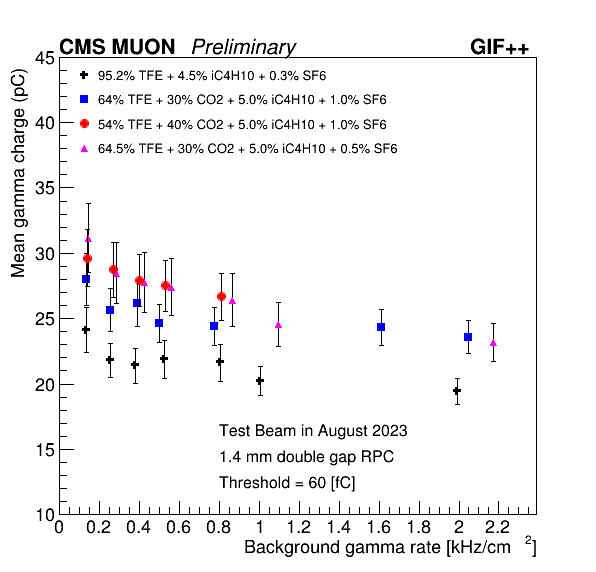

In [14]:
canvas = TCanvas("c", "c", 564, 232, 600, 600)
    
_40CO2_charge = 1000000*Features_40CO2['current'].values/(2*2070.5*Features_40CO2['noiseGammaRate'].values/Features_40CO2['gamma_CS'].values)
_40CO2_charge[0] = 0
_40CO2_charge_err = (1000000*Features_40CO2['current'].values/(2*2070.5))*(Features_40CO2['gamma_CS_err'].values/Features_40CO2['noiseGammaRate'].values) 
_40CO2 = TGraphErrors(6, 
                   Features_40CO2['noiseGammaRate'].values/(Features_40CO2['gamma_CS'].values*1000), 
                   _40CO2_charge,
                   0,
                   _40CO2_charge_err) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2.SetMarkerColor(2)
_40CO2.SetMarkerStyle(20)

_30CO2_charge = 1000000*Features_30CO2['current'].values/(2*2070.5*Features_30CO2['noiseGammaRate'].values/Features_30CO2['gamma_CS'].values)
_30CO2_charge[0] = 0
_30CO2_charge_err = (1000000*Features_30CO2['current'].values/(2*2070.5))*(Features_30CO2['gamma_CS_err'].values/Features_30CO2['noiseGammaRate'].values) 

_30CO2 = TGraphErrors(8, 
                   Features_30CO2['noiseGammaRate'].values/(Features_30CO2['gamma_CS'].values*1000), 
                   _30CO2_charge,
                   0,
                   _30CO2_charge_err) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2.SetMarkerColor(4)
_30CO2.SetMarkerStyle(21)

_30CO205SF6_charge = 1000000*Features_30CO205SF6['current'].values/(2*2070.5*Features_30CO205SF6['noiseGammaRate'].values/Features_30CO205SF6['gamma_CS'].values)
_30CO205SF6_charge[0] = 0
_30CO205SF6_charge_err = (1000000*Features_30CO205SF6['current'].values/(2*2070.5))*(Features_30CO205SF6['gamma_CS_err'].values/Features_30CO205SF6['noiseGammaRate'].values) 

_30CO205SF6 = TGraphErrors(8, 
                   Features_30CO205SF6['noiseGammaRate'].values/(Features_30CO205SF6['gamma_CS'].values*1000), 
                   _30CO205SF6_charge,
                   0,
                   _30CO205SF6_charge_err) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6.SetMarkerColor(6)
_30CO205SF6.SetMarkerStyle(22)

STDMX_charge = 1000000*Features_STDMX['current'].values/(2*2070.5*Features_STDMX['noiseGammaRate'].values/Features_STDMX['gamma_CS'].values)
STDMX_charge[0] = 0
STDMX_charge_err = (1000000*Features_STDMX['current'].values/(2*2070.5))*(Features_STDMX['gamma_CS_err'].values/Features_STDMX['noiseGammaRate'].values) 

STDMX = TGraphErrors(8, 
                   Features_STDMX['noiseGammaRate'].values/(Features_STDMX['gamma_CS'].values*1000), 
                   STDMX_charge,
                   0,
                   STDMX_charge_err) #values from df[].values to convert dataframe object in array suitable for the tgraph
STDMX.SetMarkerColor(1)
STDMX.SetMarkerStyle(34)

_30CO205SF6.SetTitle("")
_30CO205SF6.GetXaxis().SetTitle("Background gamma rate [kHz/cm^{2}]")
_30CO205SF6.GetYaxis().SetTitle("Mean gamma charge (pC)")
_30CO205SF6.GetYaxis().SetTitleOffset(1.2)
_30CO205SF6.GetYaxis().SetRangeUser(10., 45.)
_30CO205SF6.GetYaxis().SetMaxDigits(3)
_30CO205SF6.Draw("AP")
_30CO2.Draw("PSAME")
_40CO2.Draw("PSAME")
STDMX.Draw("PSAME")

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.12, 0.72, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.025); 
legend.AddEntry(STDMX, "95.2% TFE + 4.5% iC4H10 + 0.3% SF6", "P");
legend.AddEntry(_30CO2, "64% TFE + 30% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_40CO2, "54% TFE + 40% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_30CO205SF6, "64.5% TFE + 30% CO2 + 5.0% iC4H10 + 0.5% SF6", "P");
legend.Draw();

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.03);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(0.8, 16., "Test Beam in August 2023");
ltx_data.DrawLatex(0.8, 14., "1.4 mm double gap RPC");
ltx_data.DrawLatex(0.8, 12., "Threshold = 60 [fC]");
ltx_data.Draw()

canvas.Draw()
canvas.SaveAs("charge.png")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file RXI.png has been created


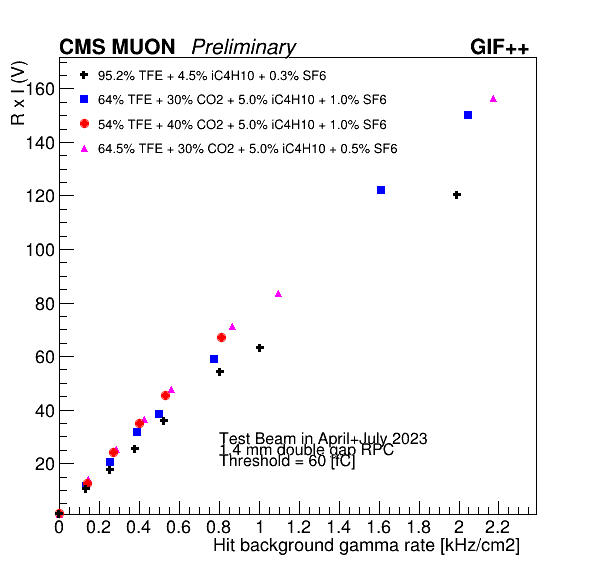

In [15]:
canvas = TCanvas("c", "c", 564, 232, 600, 600)
        
_40CO2 = TGraphErrors(6, 
                   Features_40CO2['noiseGammaRate'].values/(Features_40CO2['gamma_CS'].values*1000), 
                   0.75*Features_40CO2['current'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2.SetMarkerColor(2)
_40CO2.SetMarkerStyle(20)

_30CO2 = TGraphErrors(8, 
                   Features_30CO2['noiseGammaRate'].values/(Features_30CO2['gamma_CS'].values*1000), 
                   0.75*Features_30CO2['current'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2.SetMarkerColor(4)
_30CO2.SetMarkerStyle(21)

_30CO205SF6 = TGraphErrors(8, 
                   Features_30CO205SF6['noiseGammaRate'].values/(Features_30CO205SF6['gamma_CS'].values*1000), 
                   0.75*Features_30CO205SF6['current'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6.SetMarkerColor(6)
_30CO205SF6.SetMarkerStyle(22)

STDMX = TGraphErrors(8, 
                   Features_STDMX['noiseGammaRate'].values/(Features_STDMX['gamma_CS'].values*1000), 
                   0.75*Features_STDMX['current'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
STDMX.SetMarkerColor(1)
STDMX.SetMarkerStyle(34)

_30CO205SF6.SetTitle("")
_30CO205SF6.GetXaxis().SetTitle("Hit background gamma rate [kHz/cm2]")
_30CO205SF6.GetYaxis().SetTitle("R x I (V)")
_30CO205SF6.GetYaxis().SetTitleOffset(1.2)
_30CO205SF6.Draw("AP")
_30CO2.Draw("PSAME")
_40CO2.Draw("PSAME")
STDMX.Draw("PSAME")

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.12, 0.72, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.025); 
legend.AddEntry(STDMX, "95.2% TFE + 4.5% iC4H10 + 0.3% SF6", "P");
legend.AddEntry(_30CO2, "64% TFE + 30% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_40CO2, "54% TFE + 40% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_30CO205SF6, "64.5% TFE + 30% CO2 + 5.0% iC4H10 + 0.5% SF6", "P");
legend.Draw();

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.03);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(0.8, 27, "Test Beam in April+July 2023");
ltx_data.DrawLatex(0.8, 23, "1.4 mm double gap RPC");
ltx_data.DrawLatex(0.8, 19, "Threshold = 60 [fC]");
ltx_data.Draw()

canvas.Draw()
canvas.SaveAs("RXI.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file MuonCM.png has been created


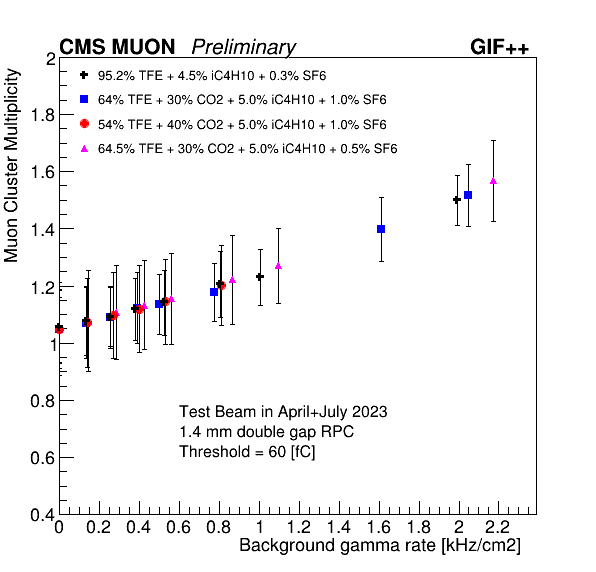

In [16]:
canvas = TCanvas("c", "c", 564, 232, 600, 600)
        
_40CO2 = TGraphErrors(6, 
                   Features_40CO2['noiseGammaRate'].values/(Features_40CO2['gamma_CS'].values*1000), 
                   Features_40CO2['muon_CM'].values,
                   0,
                   Features_40CO2['muon_CM_err'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2.SetMarkerColor(2)
_40CO2.SetMarkerStyle(20)

_30CO2 = TGraphErrors(8, 
                   Features_30CO2['noiseGammaRate'].values/(Features_30CO2['gamma_CS'].values*1000), 
                   Features_30CO2['muon_CM'].values,
                   0,
                   Features_30CO2['muon_CM_err'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2.SetMarkerColor(4)
_30CO2.SetMarkerStyle(21)

_30CO205SF6 = TGraphErrors(8, 
                   Features_30CO205SF6['noiseGammaRate'].values/(Features_30CO205SF6['gamma_CS'].values*1000), 
                   Features_30CO205SF6['muon_CM'].values,
                   0,
                   Features_30CO205SF6['muon_CM_err'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6.SetMarkerColor(6)
_30CO205SF6.SetMarkerStyle(22)

STDMX = TGraphErrors(8, 
                   Features_STDMX['noiseGammaRate'].values/(Features_STDMX['gamma_CS'].values*1000), 
                   Features_STDMX['muon_CM'].values,
                   0,
                   Features_STDMX['muon_CM_err'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
STDMX.SetMarkerColor(1)
STDMX.SetMarkerStyle(34)

_30CO205SF6.SetTitle("")
_30CO205SF6.GetXaxis().SetTitle("Background gamma rate [kHz/cm2]")
_30CO205SF6.GetYaxis().SetTitle("Muon Cluster Multiplicity")
_30CO205SF6.GetYaxis().SetTitleOffset(1.4)
_30CO205SF6.GetYaxis().SetRangeUser(0.4, 2.)
_30CO205SF6.Draw("AP")
_30CO2.Draw("PSAME")
_40CO2.Draw("PSAME")
STDMX.Draw("PSAME")

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.12, 0.72, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.025); 
legend.AddEntry(STDMX,  "95.2% TFE + 4.5% iC4H10 + 0.3% SF6", "P");
legend.AddEntry(_30CO2, "64% TFE + 30% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_40CO2, "54% TFE + 40% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_30CO205SF6, "64.5% TFE + 30% CO2 + 5.0% iC4H10 + 0.5% SF6", "P");
legend.Draw();

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.03);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(0.6, 0.74, "Test Beam in April+July 2023");
ltx_data.DrawLatex(0.6, 0.67, "1.4 mm double gap RPC");
ltx_data.DrawLatex(0.6, 0.6, "Threshold = 60 [fC]");
ltx_data.Draw()

canvas.Draw()
canvas.SaveAs("MuonCM.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file MuonCS.png has been created


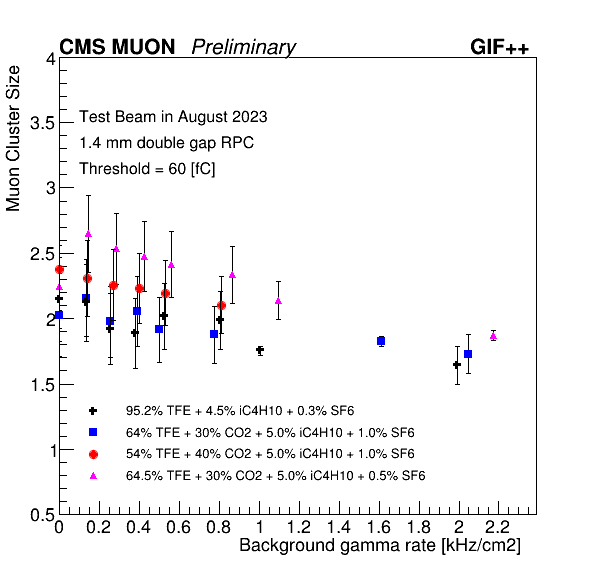

In [17]:
canvas = TCanvas("c", "c", 564, 232, 600, 600)
    
_40CO2 = TGraphErrors(6, 
                   Features_40CO2['noiseGammaRate'].values/(Features_40CO2['gamma_CS'].values*1000), 
                   Features_40CO2['muon_CS'].values,
                   0,
                   Features_40CO2['muon_CS_err'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2.SetMarkerColor(2)
_40CO2.SetMarkerStyle(20)

_30CO2 = TGraphErrors(8, 
                   Features_30CO2['noiseGammaRate'].values/(Features_30CO2['gamma_CS'].values*1000), 
                   Features_30CO2['muon_CS'].values,
                   0,
                   Features_40CO2['muon_CS_err'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2.SetMarkerColor(4)
_30CO2.SetMarkerStyle(21)


_30CO205SF6 = TGraphErrors(8, 
                   Features_30CO205SF6['noiseGammaRate'].values/(Features_30CO205SF6['gamma_CS'].values*1000), 
                   Features_30CO205SF6['muon_CS'].values,
                   0,
                   Features_40CO2['muon_CS_err'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6.SetMarkerColor(6)
_30CO205SF6.SetMarkerStyle(22)

STDMX = TGraphErrors(8, 
                   Features_STDMX['noiseGammaRate'].values/(Features_STDMX['gamma_CS'].values*1000), 
                   Features_STDMX['muon_CS'].values,
                   0,
                   Features_40CO2['muon_CS_err'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
STDMX.SetMarkerColor(1)
STDMX.SetMarkerStyle(34)

_30CO205SF6.SetTitle("")
_30CO205SF6.GetXaxis().SetTitle("Background gamma rate [kHz/cm2]")
_30CO205SF6.GetYaxis().SetTitle("Muon Cluster Size")
_30CO205SF6.GetYaxis().SetRangeUser(.5, 4.)
_30CO205SF6.GetYaxis().SetTitleOffset(1.4)
_30CO205SF6.Draw("AP")
_30CO2.Draw("PSAME")
_40CO2.Draw("PSAME")
STDMX.Draw("PSAME")

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.1, 0.15, 0.55, 0.3);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.025); 
legend.AddEntry(STDMX, "95.2% TFE + 4.5% iC4H10 + 0.3% SF6", "P");
legend.AddEntry(_30CO2, "64% TFE + 30% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_40CO2, "54% TFE + 40% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_30CO205SF6, "64.5% TFE + 30% CO2 + 5.0% iC4H10 + 0.5% SF6", "P");
legend.Draw();

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.03);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(.1, 3.5, "Test Beam in August 2023");
ltx_data.DrawLatex(.1, 3.3, "1.4 mm double gap RPC");
ltx_data.DrawLatex(.1, 3.1, "Threshold = 60 [fC]");
ltx_data.Draw()

canvas.Draw()
canvas.SaveAs("MuonCS.png")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file GammaCM.png has been created


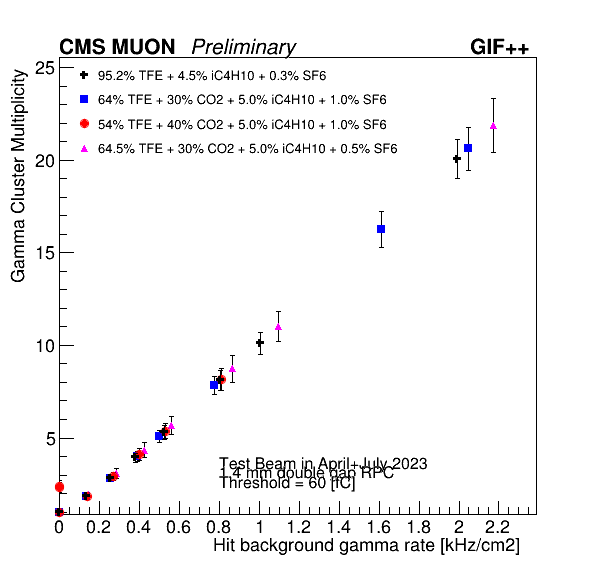

In [18]:
canvas = TCanvas("c", "c", 564, 232, 600, 600)
        
_40CO2 = TGraphErrors(8, 
                   Features_40CO2['noiseGammaRate'].values/(Features_40CO2['gamma_CS'].values*1000), 
                   Features_40CO2['gamma_CM'].values,
                   0,
                   Features_40CO2['gamma_CM_err'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2.SetMarkerColor(2)
_40CO2.SetMarkerStyle(20)

_30CO2 = TGraphErrors(8, 
                   Features_30CO2['noiseGammaRate'].values/(Features_30CO2['gamma_CS'].values*1000), 
                   Features_30CO2['gamma_CM'].values,
                   0,
                   Features_30CO2['gamma_CM_err'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2.SetMarkerColor(4)
_30CO2.SetMarkerStyle(21)

_30CO205SF6 = TGraphErrors(8, 
                   Features_30CO205SF6['noiseGammaRate'].values/(Features_30CO205SF6['gamma_CS'].values*1000), 
                   Features_30CO205SF6['gamma_CM'].values,
                   0,
                   Features_30CO205SF6['gamma_CM_err'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6.SetMarkerColor(6)
_30CO205SF6.SetMarkerStyle(22)

STDMX = TGraphErrors(8, 
                   Features_STDMX['noiseGammaRate'].values/(Features_STDMX['gamma_CS'].values*1000), 
                   Features_STDMX['gamma_CM'].values,
                   0,
                   Features_STDMX['gamma_CM_err'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
STDMX.SetMarkerColor(1)
STDMX.SetMarkerStyle(34)

_30CO205SF6.SetTitle("")
_30CO205SF6.GetXaxis().SetTitle("Hit background gamma rate [kHz/cm2]")
_30CO205SF6.GetYaxis().SetTitle("Gamma Cluster Multiplicity")
_30CO205SF6.GetYaxis().SetTitleOffset(1.2)
_30CO205SF6.Draw("AP")
_30CO2.Draw("PSAME")
_40CO2.Draw("PSAME")
STDMX.Draw("PSAME")

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.12, 0.72, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.025); 
legend.AddEntry(STDMX, "95.2% TFE + 4.5% iC4H10 + 0.3% SF6", "P");
legend.AddEntry(_30CO2, "64% TFE + 30% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_40CO2, "54% TFE + 40% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_30CO205SF6, "64.5% TFE + 30% CO2 + 5.0% iC4H10 + 0.5% SF6", "P");
legend.Draw();

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.03);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(0.8, 3.3, "Test Beam in April+July 2023");
ltx_data.DrawLatex(0.8, 2.8, "1.4 mm double gap RPC");
ltx_data.DrawLatex(0.8, 2.3, "Threshold = 60 [fC]");
ltx_data.Draw()

canvas.Draw()
canvas.SaveAs("GammaCM.png")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file GammaCS.png has been created


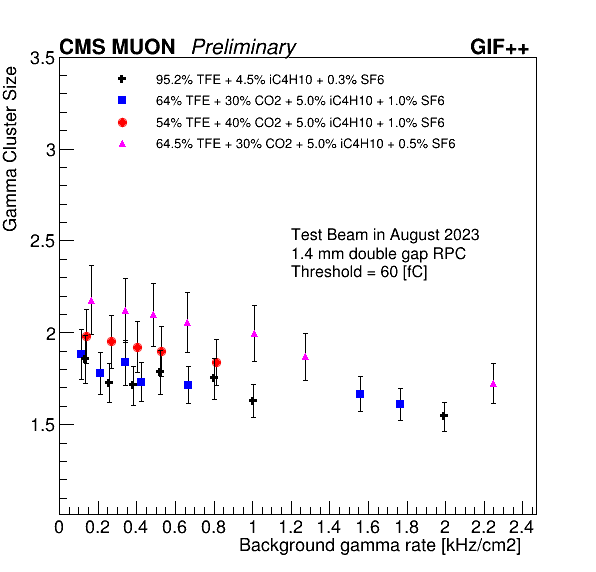

In [19]:
canvas = TCanvas("c", "c", 564, 232, 600, 600)
        
_40CO2 = TGraphErrors(8, 
                   Features_40CO2['noiseGammaRate'].values/(Features_40CO2['gamma_CS'].values*1000), 
                   Features_40CO2['gamma_CS'].values,
                   0,
                   Features_40CO2['gamma_CS_err'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2.SetMarkerColor(2)
_40CO2.SetMarkerStyle(20)


_30CO205SF6 = TGraphErrors(8, 
                   Features_30CO205SF6['noiseGammaRate'].values/(Features_30CO2['gamma_CS'].values*1000), 
                   Features_30CO205SF6['gamma_CS'].values,
                   0,
                   Features_30CO205SF6['gamma_CS_err'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6.SetMarkerColor(6)
_30CO205SF6.SetMarkerStyle(22)

_30CO2 = TGraphErrors(8, 
                   Features_30CO2['noiseGammaRate'].values/(Features_30CO205SF6['gamma_CS'].values*1000), 
                   Features_30CO2['gamma_CS'].values,
                   0,
                   Features_30CO2['gamma_CS_err'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2.SetMarkerColor(4)
_30CO2.SetMarkerStyle(21)

STDMX = TGraphErrors(8, 
                   Features_STDMX['noiseGammaRate'].values/(Features_STDMX['gamma_CS'].values*1000), 
                   Features_STDMX['gamma_CS'].values,
                   0,
                   Features_STDMX['gamma_CS_err'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
STDMX.SetMarkerColor(1)
STDMX.SetMarkerStyle(34)

_30CO205SF6.SetTitle("")
_30CO205SF6.GetXaxis().SetTitle("Background gamma rate [kHz/cm2]")
_30CO205SF6.GetYaxis().SetTitle("Gamma Cluster Size")
_30CO205SF6.GetYaxis().SetTitleOffset(1.5)
_30CO205SF6.GetYaxis().SetRangeUser(1.01, 3.5)
_30CO205SF6.Draw("AP")
_30CO2.Draw("PSAME")
_40CO2.Draw("PSAME")
STDMX.Draw("PSAME")

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.15, 0.73, 0.6, 0.88);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.025); 
legend.AddEntry(STDMX, "95.2% TFE + 4.5% iC4H10 + 0.3% SF6", "P");
legend.AddEntry(_30CO2, "64% TFE + 30% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_40CO2, "54% TFE + 40% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_30CO205SF6, "64.5% TFE + 30% CO2 + 5.0% iC4H10 + 0.5% SF6", "P");
legend.Draw();

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.03);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(1.2, 2.5, "Test Beam in August 2023");
ltx_data.DrawLatex(1.2, 2.4, "1.4 mm double gap RPC");
ltx_data.DrawLatex(1.2, 2.3, "Threshold = 60 [fC]");
ltx_data.Draw()

canvas.Draw()
canvas.SaveAs("GammaCS.png")

In [20]:
"""
canvas = TCanvas("c", "c", 564, 232, 600, 600)
        
_40CO2 = TGraphErrors(6, 
                   Features_40CO2['noiseGammaRate'].values/(Features_40CO2['gamma_CS'].values*1000), 
                   Features_40CO2['WP'].values/1000,
                   0,
                   Features_40CO2['WP_err'].values/1000) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2.SetMarkerColor(2)
_40CO2.SetMarkerStyle(20)

_30CO2 = TGraphErrors(6, 
                   Features_30CO2['noiseGammaRate'].values/(Features_30CO2['gamma_CS'].values*1000), 
                   Features_30CO2['WP'].values/1000,
                   0,
                   Features_30CO2['WP_err'].values/1000) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2.SetMarkerColor(4)
_30CO2.SetMarkerStyle(21)

_30CO205SF6 = TGraphErrors(6, 
                   Features_30CO205SF6['noiseGammaRate'].values/(Features_30CO205SF6['gamma_CS'].values*1000), 
                   Features_30CO205SF6['WP'].values/1000,
                   0,
                   Features_30CO205SF6['WP_err'].values/1000) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6.SetMarkerColor(6)
_30CO205SF6.SetMarkerStyle(22)

STDMX = TGraphErrors(6, 
                   Features_STDMX['noiseGammaRate'].values/(Features_STDMX['gamma_CS'].values*1000), 
                   Features_STDMX['WP'].values/1000,
                   0,
                   Features_STDMX['WP_err'].values/1000) #values from df[].values to convert dataframe object in array suitable for the tgraph
STDMX.SetMarkerColor(1)
STDMX.SetMarkerStyle(34)


_40CO2.GetHistogram().SetMaximum(7.5)
_40CO2.SetTitle("")
_40CO2.GetXaxis().SetTitle("Hit background gamma rate [kHz/cm^{2}]")
_40CO2.GetYaxis().SetTitle("Working Point (kV)")
_40CO2.GetYaxis().SetTitleOffset(1.5)
_40CO2.GetYaxis().SetRangeUser(6.88, 7.5)
_40CO2.Draw("AP")
_30CO2.Draw("PSAME")
_30CO205SF6.Draw("PSAME")
STDMX.Draw("PSAME")

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.12, 0.72, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.025); 
legend.AddEntry(STDMX, "95.2% TFE + 4.5% iC4H10 + 0.3% SF6", "P");
legend.AddEntry(_30CO2, "64% TFE + 30% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_40CO2, "54% TFE + 40% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_30CO205SF6, "64.5% TFE + 30% CO2 + 5.0% iC4H10 + 0.5% SF6", "P");
legend.Draw();

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.03);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(0.1, 7.325, "Test Beam in April+July 2023");
ltx_data.DrawLatex(0.1, 7.305, "1.4 mm double gap RPC");
ltx_data.DrawLatex(0.1, 7.28, "Threshold = 60 [fC]");
ltx_data.Draw()

canvas.Draw()
canvas.SaveAs("WP.png")
"""

'\ncanvas = TCanvas("c", "c", 564, 232, 600, 600)\n        \n_40CO2 = TGraphErrors(6, \n                   Features_40CO2[\'noiseGammaRate\'].values/(Features_40CO2[\'gamma_CS\'].values*1000), \n                   Features_40CO2[\'WP\'].values/1000,\n                   0,\n                   Features_40CO2[\'WP_err\'].values/1000) #values from df[].values to convert dataframe object in array suitable for the tgraph\n_40CO2.SetMarkerColor(2)\n_40CO2.SetMarkerStyle(20)\n\n_30CO2 = TGraphErrors(6, \n                   Features_30CO2[\'noiseGammaRate\'].values/(Features_30CO2[\'gamma_CS\'].values*1000), \n                   Features_30CO2[\'WP\'].values/1000,\n                   0,\n                   Features_30CO2[\'WP_err\'].values/1000) #values from df[].values to convert dataframe object in array suitable for the tgraph\n_30CO2.SetMarkerColor(4)\n_30CO2.SetMarkerStyle(21)\n\n_30CO205SF6 = TGraphErrors(6, \n                   Features_30CO205SF6[\'noiseGammaRate\'].values/(Features_30C

Features_40CO2['eff_error'].values =  [0.00190616 0.00112    0.00116856 0.00188066 0.00139021 0.00150045]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file Efficiency.png has been created
Info in <TCanvas::Print>: pdf file Efficiency.pdf has been created


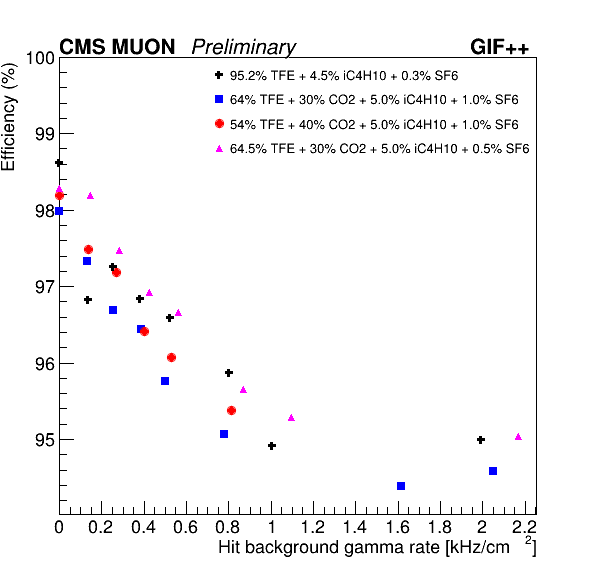

In [21]:
canvas = TCanvas("c", "c", 564, 232, 600, 600)

print("Features_40CO2['eff_error'].values = ", Features_40CO2['eff_error'].values)

_40CO2 = TGraphErrors(6, 
                   Features_40CO2['noiseGammaRate'].values/(Features_40CO2['gamma_CS'].values*1000), 
                   Features_40CO2['efficiency'].values,
                   0,
                   Features_40CO2['eff_error'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2.SetMarkerColor(2)
_40CO2.SetMarkerStyle(20)

_30CO2 = TGraphErrors(8, 
                   Features_30CO2['noiseGammaRate'].values/(Features_30CO2['gamma_CS'].values*1000), 
                   Features_30CO2['efficiency'].values,
                   0,
                   Features_30CO2['eff_error'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2.SetMarkerColor(4)
_30CO2.SetMarkerStyle(21)


_30CO205SF6 = TGraphErrors(8, 
                   Features_30CO205SF6['noiseGammaRate'].values/(Features_30CO205SF6['gamma_CS'].values*1000), 
                   Features_30CO205SF6['efficiency'].values,
                   0,
                   Features_30CO205SF6['eff_error'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6.SetMarkerColor(6)
_30CO205SF6.SetMarkerStyle(22)

STDMX = TGraphErrors(8, 
                   Features_STDMX['noiseGammaRate'].values/(Features_STDMX['gamma_CS'].values*1000), 
                   Features_STDMX['efficiency'].values,
                   0,
                   Features_STDMX['eff_error'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
STDMX.SetMarkerColor(1)
STDMX.SetMarkerStyle(34)

_30CO2.GetHistogram().SetMaximum(100)
_30CO2.SetTitle("")
_30CO2.GetXaxis().SetTitle("Hit background gamma rate [kHz/cm^{2}]")
_30CO2.GetYaxis().SetTitle("Efficiency (%)")
_30CO2.GetYaxis().SetTitleOffset(1.5)
_30CO2.Draw("AP")
_40CO2.Draw("PSAME")
_30CO205SF6.Draw("PSAME")
STDMX.Draw("PSAME")

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.35, 0.72, 0.5, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.025); 
legend.AddEntry(STDMX, "95.2% TFE + 4.5% iC4H10 + 0.3% SF6", "P");
legend.AddEntry(_30CO2, "64% TFE + 30% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_40CO2, "54% TFE + 40% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_30CO205SF6, "64.5% TFE + 30% CO2 + 5.0% iC4H10 + 0.5% SF6", "P");
legend.Draw();

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.03);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(0.2, 92.8, "Test Beam in April+July 2023");
ltx_data.DrawLatex(0.2, 92.4, "1.4 mm double gap RPC");
ltx_data.DrawLatex(0.2, 92., "Threshold = 60 [fC]");
ltx_data.Draw()

canvas.Draw()
canvas.SaveAs("Efficiency.png")
canvas.SaveAs("Efficiency.pdf")


In [22]:
"""canvas = TCanvas("c", "c", 564, 232, 600, 600)

n = len(HVCurrentDataFrame(scans['40CO2_22'])['HV_top'])

_40CO2_22 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['40CO2_22'])['HV_top'].values-Features_40CO2['WP'][1] , 
                   HVCurrentDataFrame(scans['40CO2_22'])['gamma_stream'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2_22.SetMarkerColor(2)
_40CO2_22.SetMarkerStyle(25)

n = len(HVCurrentDataFrame(scans['30CO2_22'])['HV_top'])

_30CO2_22 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['30CO2_22'])['HV_top'].values-Features_30CO2['WP'][1], 
                   HVCurrentDataFrame(scans['30CO2_22'])['gamma_stream'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2_22.SetMarkerColor(4)
_30CO2_22.SetMarkerStyle(24)

n = len(HVCurrentDataFrame(scans['30CO205SF6_22'])['HV_top'])

_30CO205SF6_22 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['30CO205SF6_22'])['HV_top'].values-Features_30CO205SF6['WP'][1], 
                   HVCurrentDataFrame(scans['30CO205SF6_22'])['gamma_stream'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6_22.SetMarkerColor(4)
_30CO205SF6_22.SetMarkerStyle(27)
_30CO205SF6_22.SetMarkerSize(1.5)

n = len(HVCurrentDataFrame(scans['STDMX_22'])['HV_top'])

_STDMX_22 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['STDMX_22'])['HV_top'].values-Features_STDMX['WP'][1], 
                   HVCurrentDataFrame(scans['STDMX_22'])['gamma_stream'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_STDMX_22.SetMarkerColor(1)
_STDMX_22.SetMarkerStyle(26)

n = len(HVCurrentDataFrame(scans['40CO2_3.3'])['HV_top'])

_40CO2_33 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['40CO2_3.3'])['HV_top'].values-Features_40CO2['WP'][5], 
                   HVCurrentDataFrame(scans['40CO2_3.3'])['gamma_stream'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2_33.SetMarkerColor(2)
_40CO2_33.SetMarkerStyle(21)

n = len(HVCurrentDataFrame(scans['30CO2_3.3'])['HV_top'])


_30CO2_33 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['30CO2_3.3'])['HV_top'].values-Features_30CO2['WP'][5], 
                   HVCurrentDataFrame(scans['30CO2_3.3'])['gamma_stream'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2_33.SetMarkerColor(4)
_30CO2_33.SetMarkerStyle(20)

n = len(HVCurrentDataFrame(scans['30CO205SF6_3.3'])['HV_top'])

_30CO205SF6_33 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['30CO205SF6_3.3'])['HV_top'].values-Features_30CO205SF6['WP'][5], 
                   HVCurrentDataFrame(scans['30CO205SF6_3.3'])['gamma_stream'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6_33.SetMarkerColor(4)
_30CO205SF6_33.SetMarkerStyle(33)
_30CO205SF6_33.SetMarkerSize(1.5)

n = len(HVCurrentDataFrame(scans['STDMX_3.3'])['HV_top'])

_STDMX_33 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['STDMX_3.3'])['HV_top'].values-Features_STDMX['WP'][5], 
                   HVCurrentDataFrame(scans['STDMX_3.3'])['gamma_stream'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_STDMX_33.SetMarkerColor(1)
_STDMX_33.SetMarkerStyle(22)

#_40CO2.GetHistogram().SetMaximum(100)
_30CO205SF6_33.SetTitle("")
_30CO205SF6_33.GetXaxis().SetTitle("HV_{eff}-HV_{WP} (V)")
_30CO205SF6_33.GetYaxis().SetTitle("Gamma streamer probability (%)")
_30CO205SF6_33.GetYaxis().SetTitleOffset(1.5)
#_30CO205SF6_33.GetYaxis().SetRangeUser(0., 45.)
_30CO205SF6_33.Draw("AP")
_30CO2_22.Draw("PSAME")
_STDMX_22.Draw("PSAME")
_30CO205SF6_22.Draw("PSAME")
_40CO2_33.Draw("PSAME")
_40CO2_22.Draw("PSAME")
_30CO2_33.Draw("PSAME")
_STDMX_33.Draw("PSAME")

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.1, 0.6, 0.5, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.03); 
print(Features_STDMX['noiseGammaRate'][1]/(Features_STDMX['gamma_CS'][1]*1000))
txt_STDMX_22 = 'standard gas mixture @ {a:.1f} kHz/cm2'.format(a=float(Features_STDMX['noiseGammaRate'][1]/(Features_STDMX['gamma_CS'][1]*1000)))
txt_30CO2_22 = '+30% CO2 +1% SF6 @ {a:.1f} kHz/cm2'.format(a=float(Features_30CO2['noiseGammaRate'][1]/(Features_30CO2['gamma_CS'][1]*1000)))
txt_30CO205SF6_22 = '+30% CO2 +0.5% SF6  @ {a:.1f} kHz/cm2'.format(a=float(Features_30CO205SF6['noiseGammaRate'][1]/(Features_30CO205SF6['gamma_CS'][1]*1000)))
txt_40CO2_22 = '+40% CO2 +1% SF6 @ {a:.1f} kHz/cm2'.format(a=float(Features_40CO2['noiseGammaRate'][1]/(Features_40CO2['gamma_CS'][1]*1000)))
txt_STDMX_33 = 'standard gas mixture @ {a:.1f} kHz/cm2'.format(a=float(Features_STDMX['noiseGammaRate'][5]/(Features_STDMX['gamma_CS'][5]*1000)))
txt_30CO2_33 = '+30% CO2 +1% SF6 @ {a:.1f} kHz/cm2'.format(a=float(Features_30CO2['noiseGammaRate'][5]/(Features_30CO2['gamma_CS'][5]*1000)))
txt_30CO205SF6_33 = '+30% CO2 +0.5% SF6  @ {a:.1f} kHz/cm2'.format(a=float(Features_30CO205SF6['noiseGammaRate'][5]/(Features_30CO205SF6['gamma_CS'][5]*1000)))
txt_40CO2_33 = '+40% CO2 +1% SF6 @ {a:.1f} kHz/cm2'.format(a=float(Features_40CO2['noiseGammaRate'][5]/(Features_40CO2['gamma_CS'][5]*1000)))

legend.AddEntry(_STDMX_22, txt_STDMX_22, "P");
legend.AddEntry(_30CO2_22, txt_30CO2_22, "P");
legend.AddEntry(_30CO205SF6_22, txt_30CO205SF6_22, "P");
legend.AddEntry(_40CO2_22, txt_40CO2_22, "P");
legend.AddEntry(_STDMX_33, txt_STDMX_33, "P");
legend.AddEntry(_30CO2_33, txt_30CO2_33, "P");
legend.AddEntry(_30CO205SF6_33, txt_30CO205SF6_33, "P");
legend.AddEntry(_40CO2_33, txt_40CO2_33, "P");
legend.Draw();

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.03);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(-900, 10, "Test Beam in April+July 2023");
ltx_data.DrawLatex(-900, 12, "1.4 mm double gap RPC");
ltx_data.DrawLatex(-900, 14, "Threshold = 60 [fC]");
ltx_data.Draw()

canvas.Draw()

canvas.SaveAs("GammaSP.png")
"""

'canvas = TCanvas("c", "c", 564, 232, 600, 600)\n\nn = len(HVCurrentDataFrame(scans[\'40CO2_22\'])[\'HV_top\'])\n\n_40CO2_22 = TGraphErrors(n, \n                   HVCurrentDataFrame(scans[\'40CO2_22\'])[\'HV_top\'].values-Features_40CO2[\'WP\'][1] , \n                   HVCurrentDataFrame(scans[\'40CO2_22\'])[\'gamma_stream\'].values,\n                   0,\n                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph\n_40CO2_22.SetMarkerColor(2)\n_40CO2_22.SetMarkerStyle(25)\n\nn = len(HVCurrentDataFrame(scans[\'30CO2_22\'])[\'HV_top\'])\n\n_30CO2_22 = TGraphErrors(n, \n                   HVCurrentDataFrame(scans[\'30CO2_22\'])[\'HV_top\'].values-Features_30CO2[\'WP\'][1], \n                   HVCurrentDataFrame(scans[\'30CO2_22\'])[\'gamma_stream\'].values,\n                   0,\n                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph\n_30CO2_22.SetMarkerColor(4)\n_30CO2_22.SetMarkerS

In [23]:
"""
canvas = TCanvas("c", "c", 564, 232, 600, 600)

n = len(HVCurrentDataFrame(scans['40CO2_22'])['HV_top'])

_40CO2_22 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['40CO2_22'])['HV_top'].values-Features_40CO2['WP'][1] , 
                   HVCurrentDataFrame(scans['40CO2_22'])['muon_CS'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2_22.SetMarkerColor(2)
_40CO2_22.SetMarkerStyle(25)

n = len(HVCurrentDataFrame(scans['30CO2_22'])['HV_top'])

_30CO2_22 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['30CO2_22'])['HV_top'].values-Features_30CO2['WP'][1], 
                   HVCurrentDataFrame(scans['30CO2_22'])['muon_CS'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2_22.SetMarkerColor(4)
_30CO2_22.SetMarkerStyle(24)

n = len(HVCurrentDataFrame(scans['30CO205SF6_22'])['HV_top'])

_30CO205SF6_22 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['30CO205SF6_22'])['HV_top'].values-Features_30CO205SF6['WP'][1], 
                   HVCurrentDataFrame(scans['30CO205SF6_22'])['muon_CS'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6_22.SetMarkerColor(4)
_30CO205SF6_22.SetMarkerStyle(27)
_30CO205SF6_22.SetMarkerSize(1.5)

n = len(HVCurrentDataFrame(scans['STDMX_22'])['HV_top'])

_STDMX_22 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['STDMX_22'])['HV_top'].values-Features_STDMX['WP'][1], 
                   HVCurrentDataFrame(scans['STDMX_22'])['muon_CS'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_STDMX_22.SetMarkerColor(1)
_STDMX_22.SetMarkerStyle(26)

n = len(HVCurrentDataFrame(scans['40CO2_3.3'])['HV_top'])

_40CO2_33 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['40CO2_3.3'])['HV_top'].values-Features_40CO2['WP'][5], 
                   HVCurrentDataFrame(scans['40CO2_3.3'])['muon_CS'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2_33.SetMarkerColor(2)
_40CO2_33.SetMarkerStyle(21)

n = len(HVCurrentDataFrame(scans['30CO2_3.3'])['HV_top'])


_30CO2_33 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['30CO2_3.3'])['HV_top'].values-Features_30CO2['WP'][5], 
                   HVCurrentDataFrame(scans['30CO2_3.3'])['muon_CS'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2_33.SetMarkerColor(4)
_30CO2_33.SetMarkerStyle(20)

n = len(HVCurrentDataFrame(scans['30CO205SF6_3.3'])['HV_top'])

_30CO205SF6_33 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['30CO205SF6_3.3'])['HV_top'].values-Features_30CO205SF6['WP'][5], 
                   HVCurrentDataFrame(scans['30CO205SF6_3.3'])['muon_CS'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6_33.SetMarkerColor(4)
_30CO205SF6_33.SetMarkerStyle(33)
_30CO205SF6_33.SetMarkerSize(1.5)

n = len(HVCurrentDataFrame(scans['STDMX_3.3'])['HV_top'])

_STDMX_33 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['STDMX_3.3'])['HV_top'].values-Features_STDMX['WP'][5], 
                   HVCurrentDataFrame(scans['STDMX_3.3'])['muon_CS'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_STDMX_33.SetMarkerColor(1)
_STDMX_33.SetMarkerStyle(22)

#_40CO2.GetHistogram().SetMaximum(100)
_30CO205SF6_33.SetTitle("")
_30CO205SF6_33.GetXaxis().SetTitle("HV_{eff}-HV_{WP} (V)")
_30CO205SF6_33.GetYaxis().SetTitle("Muon Cluster Size")
_30CO205SF6_33.GetYaxis().SetTitleOffset(1.5)
#_30CO205SF6_33.GetYaxis().SetRangeUser(0., 45.)
_30CO205SF6_33.Draw("AP")
_30CO2_22.Draw("PSAME")
_STDMX_22.Draw("PSAME")
_30CO205SF6_22.Draw("PSAME")
_40CO2_33.Draw("PSAME")
_40CO2_22.Draw("PSAME")
_30CO2_33.Draw("PSAME")
_STDMX_33.Draw("PSAME")

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.1, 0.6, 0.5, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.03); 
print(Features_STDMX['noiseGammaRate'][1]/(Features_STDMX['gamma_CS'][1]*1000))
txt_STDMX_22 = 'standard gas mixture @ {a:.1f} kHz/cm2'.format(a=float(Features_STDMX['noiseGammaRate'][1]/(Features_STDMX['gamma_CS'][1]*1000)))
txt_30CO2_22 = '+30% CO2 +1% SF6 @ {a:.1f} kHz/cm2'.format(a=float(Features_30CO2['noiseGammaRate'][1]/(Features_30CO2['gamma_CS'][1]*1000)))
txt_30CO205SF6_22 = '+30% CO2 +0.5% SF6  @ {a:.1f} kHz/cm2'.format(a=float(Features_30CO205SF6['noiseGammaRate'][1]/(Features_30CO205SF6['gamma_CS'][1]*1000)))
txt_40CO2_22 = '+40% CO2 +1% SF6 @ {a:.1f} kHz/cm2'.format(a=float(Features_40CO2['noiseGammaRate'][1]/(Features_40CO2['gamma_CS'][1]*1000)))
txt_STDMX_33 = 'standard gas mixture @ {a:.1f} kHz/cm2'.format(a=float(Features_STDMX['noiseGammaRate'][5]/(Features_STDMX['gamma_CS'][5]*1000)))
txt_30CO2_33 = '+30% CO2 +1% SF6 @ {a:.1f} kHz/cm2'.format(a=float(Features_30CO2['noiseGammaRate'][5]/(Features_30CO2['gamma_CS'][5]*1000)))
txt_30CO205SF6_33 = '+30% CO2 +0.5% SF6  @ {a:.1f} kHz/cm2'.format(a=float(Features_30CO205SF6['noiseGammaRate'][5]/(Features_30CO205SF6['gamma_CS'][5]*1000)))
txt_40CO2_33 = '+40% CO2 +1% SF6 @ {a:.1f} kHz/cm2'.format(a=float(Features_40CO2['noiseGammaRate'][5]/(Features_40CO2['gamma_CS'][5]*1000)))

legend.AddEntry(_STDMX_22, txt_STDMX_22, "P");
legend.AddEntry(_30CO2_22, txt_30CO2_22, "P");
legend.AddEntry(_30CO205SF6_22, txt_30CO205SF6_22, "P");
legend.AddEntry(_40CO2_22, txt_40CO2_22, "P");
legend.AddEntry(_STDMX_33, txt_STDMX_33, "P");
legend.AddEntry(_30CO2_33, txt_30CO2_33, "P");
legend.AddEntry(_30CO205SF6_33, txt_30CO205SF6_33, "P");
legend.AddEntry(_40CO2_33, txt_40CO2_33, "P");
legend.Draw();

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.03);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(-900, 4, "Test Beam in April+July 2023");
ltx_data.DrawLatex(-900, 5, "1.4 mm double gap RPC");
ltx_data.DrawLatex(-900, 6, "KODEL FEB");
ltx_data.DrawLatex(-900, 7, "Threshold = 60 [fC]");
ltx_data.Draw()

canvas.Draw()

canvas.SaveAs("Muon_CS_in_HV.png")
"""

'\ncanvas = TCanvas("c", "c", 564, 232, 600, 600)\n\nn = len(HVCurrentDataFrame(scans[\'40CO2_22\'])[\'HV_top\'])\n\n_40CO2_22 = TGraphErrors(n, \n                   HVCurrentDataFrame(scans[\'40CO2_22\'])[\'HV_top\'].values-Features_40CO2[\'WP\'][1] , \n                   HVCurrentDataFrame(scans[\'40CO2_22\'])[\'muon_CS\'].values,\n                   0,\n                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph\n_40CO2_22.SetMarkerColor(2)\n_40CO2_22.SetMarkerStyle(25)\n\nn = len(HVCurrentDataFrame(scans[\'30CO2_22\'])[\'HV_top\'])\n\n_30CO2_22 = TGraphErrors(n, \n                   HVCurrentDataFrame(scans[\'30CO2_22\'])[\'HV_top\'].values-Features_30CO2[\'WP\'][1], \n                   HVCurrentDataFrame(scans[\'30CO2_22\'])[\'muon_CS\'].values,\n                   0,\n                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph\n_30CO2_22.SetMarkerColor(4)\n_30CO2_22.SetMarkerStyle(24)

In [24]:
"""
canvas = TCanvas("c", "c", 564, 232, 600, 600)

n = len(HVCurrentDataFrame(scans['40CO2_22'])['HV_top'])

_40CO2_22 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['40CO2_22'])['HV_top'].values-Features_40CO2['WP'][1] , 
                   HVCurrentDataFrame(scans['40CO2_22'])['gamma_CS'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2_22.SetMarkerColor(2)
_40CO2_22.SetMarkerStyle(25)

n = len(HVCurrentDataFrame(scans['30CO2_22'])['HV_top'])

_30CO2_22 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['30CO2_22'])['HV_top'].values-Features_30CO2['WP'][1], 
                   HVCurrentDataFrame(scans['30CO2_22'])['gamma_CS'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2_22.SetMarkerColor(4)
_30CO2_22.SetMarkerStyle(24)

n = len(HVCurrentDataFrame(scans['30CO205SF6_22'])['HV_top'])

_30CO205SF6_22 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['30CO205SF6_22'])['HV_top'].values-Features_30CO205SF6['WP'][1], 
                   HVCurrentDataFrame(scans['30CO205SF6_22'])['gamma_CS'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6_22.SetMarkerColor(4)
_30CO205SF6_22.SetMarkerStyle(27)
_30CO205SF6_22.SetMarkerSize(1.5)

n = len(HVCurrentDataFrame(scans['STDMX_22'])['HV_top'])

_STDMX_22 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['STDMX_22'])['HV_top'].values-Features_STDMX['WP'][1], 
                   HVCurrentDataFrame(scans['STDMX_22'])['gamma_CS'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_STDMX_22.SetMarkerColor(1)
_STDMX_22.SetMarkerStyle(26)

n = len(HVCurrentDataFrame(scans['40CO2_3.3'])['HV_top'])

_40CO2_33 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['40CO2_3.3'])['HV_top'].values-Features_40CO2['WP'][5], 
                   HVCurrentDataFrame(scans['40CO2_3.3'])['gamma_CS'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2_33.SetMarkerColor(2)
_40CO2_33.SetMarkerStyle(21)

n = len(HVCurrentDataFrame(scans['30CO2_3.3'])['HV_top'])


_30CO2_33 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['30CO2_3.3'])['HV_top'].values-Features_30CO2['WP'][5], 
                   HVCurrentDataFrame(scans['30CO2_3.3'])['gamma_CS'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2_33.SetMarkerColor(4)
_30CO2_33.SetMarkerStyle(20)

n = len(HVCurrentDataFrame(scans['30CO205SF6_3.3'])['HV_top'])

_30CO205SF6_33 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['30CO205SF6_3.3'])['HV_top'].values-Features_30CO205SF6['WP'][5], 
                   HVCurrentDataFrame(scans['30CO205SF6_3.3'])['gamma_CS'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6_33.SetMarkerColor(4)
_30CO205SF6_33.SetMarkerStyle(33)
_30CO205SF6_33.SetMarkerSize(1.5)

n = len(HVCurrentDataFrame(scans['STDMX_3.3'])['HV_top'])

_STDMX_33 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['STDMX_3.3'])['HV_top'].values-Features_STDMX['WP'][5], 
                   HVCurrentDataFrame(scans['STDMX_3.3'])['gamma_CS'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_STDMX_33.SetMarkerColor(1)
_STDMX_33.SetMarkerStyle(22)

#_40CO2.GetHistogram().SetMaximum(100)
_30CO205SF6_22.SetTitle("")
_30CO205SF6_22.GetXaxis().SetTitle("HV_{eff}-HV_{WP} (V)")
_30CO205SF6_22.GetYaxis().SetTitle("Gamma Cluster Size")
_30CO205SF6_22.GetYaxis().SetTitleOffset(1.5)
#_30CO205SF6_33.GetYaxis().SetRangeUser(0., 45.)
_30CO205SF6_22.Draw("AP")
_30CO2_22.Draw("PSAME")
_STDMX_22.Draw("PSAME")
_30CO205SF6_33.Draw("PSAME")
_40CO2_33.Draw("PSAME")
_40CO2_22.Draw("PSAME")
_30CO2_33.Draw("PSAME")
_STDMX_33.Draw("PSAME")

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.1, 0.6, 0.5, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.03); 
print(Features_STDMX['noiseGammaRate'][1]/(Features_STDMX['gamma_CS'][1]*1000))
txt_STDMX_22 = 'standard gas mixture @ {a:.1f} kHz/cm2'.format(a=float(Features_STDMX['noiseGammaRate'][1]/(Features_STDMX['gamma_CS'][1]*1000)))
txt_30CO2_22 = '+30% CO2 +1% SF6 @ {a:.1f} kHz/cm2'.format(a=float(Features_30CO2['noiseGammaRate'][1]/(Features_30CO2['gamma_CS'][1]*1000)))
txt_30CO205SF6_22 = '+30% CO2 +0.5% SF6  @ {a:.1f} kHz/cm2'.format(a=float(Features_30CO205SF6['noiseGammaRate'][1]/(Features_30CO205SF6['gamma_CS'][1]*1000)))
txt_40CO2_22 = '+40% CO2 +1% SF6 @ {a:.1f} kHz/cm2'.format(a=float(Features_40CO2['noiseGammaRate'][1]/(Features_40CO2['gamma_CS'][1]*1000)))
txt_STDMX_33 = 'standard gas mixture @ {a:.1f} kHz/cm2'.format(a=float(Features_STDMX['noiseGammaRate'][5]/(Features_STDMX['gamma_CS'][5]*1000)))
txt_30CO2_33 = '+30% CO2 +1% SF6 @ {a:.1f} kHz/cm2'.format(a=float(Features_30CO2['noiseGammaRate'][5]/(Features_30CO2['gamma_CS'][5]*1000)))
txt_30CO205SF6_33 = '+30% CO2 +0.5% SF6  @ {a:.1f} kHz/cm2'.format(a=float(Features_30CO205SF6['noiseGammaRate'][5]/(Features_30CO205SF6['gamma_CS'][5]*1000)))
txt_40CO2_33 = '+40% CO2 +1% SF6 @ {a:.1f} kHz/cm2'.format(a=float(Features_40CO2['noiseGammaRate'][5]/(Features_40CO2['gamma_CS'][5]*1000)))

legend.AddEntry(_STDMX_22, txt_STDMX_22, "P");
legend.AddEntry(_30CO2_22, txt_30CO2_22, "P");
legend.AddEntry(_30CO205SF6_22, txt_30CO205SF6_22, "P");
legend.AddEntry(_40CO2_22, txt_40CO2_22, "P");
legend.AddEntry(_STDMX_33, txt_STDMX_33, "P");
legend.AddEntry(_30CO2_33, txt_30CO2_33, "P");
legend.AddEntry(_30CO205SF6_33, txt_30CO205SF6_33, "P");
legend.AddEntry(_40CO2_33, txt_40CO2_33, "P");
legend.Draw();

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.03);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(-900, 4, "Test Beam in April+July 2023");
ltx_data.DrawLatex(-900, 5, "1.4 mm double gap RPC");
ltx_data.DrawLatex(-900, 6, "KODEL FEB");
ltx_data.DrawLatex(-900, 7, "Threshold = 60 [fC]");
ltx_data.Draw()

canvas.Draw()

canvas.SaveAs("Gamma_CS_in_HV.png")
"""

'\ncanvas = TCanvas("c", "c", 564, 232, 600, 600)\n\nn = len(HVCurrentDataFrame(scans[\'40CO2_22\'])[\'HV_top\'])\n\n_40CO2_22 = TGraphErrors(n, \n                   HVCurrentDataFrame(scans[\'40CO2_22\'])[\'HV_top\'].values-Features_40CO2[\'WP\'][1] , \n                   HVCurrentDataFrame(scans[\'40CO2_22\'])[\'gamma_CS\'].values,\n                   0,\n                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph\n_40CO2_22.SetMarkerColor(2)\n_40CO2_22.SetMarkerStyle(25)\n\nn = len(HVCurrentDataFrame(scans[\'30CO2_22\'])[\'HV_top\'])\n\n_30CO2_22 = TGraphErrors(n, \n                   HVCurrentDataFrame(scans[\'30CO2_22\'])[\'HV_top\'].values-Features_30CO2[\'WP\'][1], \n                   HVCurrentDataFrame(scans[\'30CO2_22\'])[\'gamma_CS\'].values,\n                   0,\n                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph\n_30CO2_22.SetMarkerColor(4)\n_30CO2_22.SetMarkerStyle(2

In [25]:
"""
canvas = TCanvas("c", "c", 564, 232, 600, 600)

n = len(HVCurrentDataFrame(scans['40CO2_22'])['HV_top'])

_40CO2_22 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['40CO2_22'])['HV_top'].values-Features_40CO2['WP'][1] , 
                   HVCurrentDataFrame(scans['40CO2_22'])['muon_stream'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2_22.SetMarkerColor(2)
_40CO2_22.SetMarkerStyle(25)

n = len(HVCurrentDataFrame(scans['30CO2_22'])['HV_top'])

_30CO2_22 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['30CO2_22'])['HV_top'].values-Features_30CO2['WP'][1], 
                   HVCurrentDataFrame(scans['30CO2_22'])['muon_stream'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2_22.SetMarkerColor(4)
_30CO2_22.SetMarkerStyle(24)

n = len(HVCurrentDataFrame(scans['30CO205SF6_22'])['HV_top'])

_30CO205SF6_22 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['30CO205SF6_22'])['HV_top'].values-Features_30CO205SF6['WP'][1], 
                   HVCurrentDataFrame(scans['30CO205SF6_22'])['muon_stream'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6_22.SetMarkerColor(4)
_30CO205SF6_22.SetMarkerStyle(27)
_30CO205SF6_22.SetMarkerSize(1.5)

n = len(HVCurrentDataFrame(scans['STDMX_22'])['HV_top'])

_STDMX_22 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['STDMX_22'])['HV_top'].values-Features_STDMX['WP'][1], 
                   HVCurrentDataFrame(scans['STDMX_22'])['muon_stream'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_STDMX_22.SetMarkerColor(1)
_STDMX_22.SetMarkerStyle(26)

n = len(HVCurrentDataFrame(scans['40CO2_3.3'])['HV_top'])

_40CO2_33 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['40CO2_3.3'])['HV_top'].values-Features_40CO2['WP'][5], 
                   HVCurrentDataFrame(scans['40CO2_3.3'])['muon_stream'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2_33.SetMarkerColor(2)
_40CO2_33.SetMarkerStyle(21)

n = len(HVCurrentDataFrame(scans['30CO2_3.3'])['HV_top'])


_30CO2_33 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['30CO2_3.3'])['HV_top'].values-Features_30CO2['WP'][5], 
                   HVCurrentDataFrame(scans['30CO2_3.3'])['muon_stream'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2_33.SetMarkerColor(4)
_30CO2_33.SetMarkerStyle(20)

n = len(HVCurrentDataFrame(scans['30CO205SF6_3.3'])['HV_top'])

_30CO205SF6_33 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['30CO205SF6_3.3'])['HV_top'].values-Features_30CO205SF6['WP'][5], 
                   HVCurrentDataFrame(scans['30CO205SF6_3.3'])['muon_stream'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6_33.SetMarkerColor(4)
_30CO205SF6_33.SetMarkerStyle(33)
_30CO205SF6_33.SetMarkerSize(1.5)

n = len(HVCurrentDataFrame(scans['STDMX_3.3'])['HV_top'])

_STDMX_33 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['STDMX_3.3'])['HV_top'].values-Features_STDMX['WP'][5], 
                   HVCurrentDataFrame(scans['STDMX_3.3'])['muon_stream'].values,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_STDMX_33.SetMarkerColor(1)
_STDMX_33.SetMarkerStyle(22)

#_40CO2.GetHistogram().SetMaximum(100)
_30CO205SF6_33.SetTitle("")
_30CO205SF6_33.GetXaxis().SetTitle("HV_{eff}-HV_{WP} (V)")
_30CO205SF6_33.GetYaxis().SetTitle("Muon streamer probability (%)")
_30CO205SF6_33.GetYaxis().SetTitleOffset(1.5)
#_30CO205SF6_33.GetYaxis().SetRangeUser(0., 15.)
_30CO205SF6_33.Draw("AP")
_30CO2_22.Draw("PSAME")
_STDMX_22.Draw("PSAME")
_30CO205SF6_22.Draw("PSAME")
_40CO2_33.Draw("PSAME")
_40CO2_22.Draw("PSAME")
_30CO2_33.Draw("PSAME")
_STDMX_33.Draw("PSAME")

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.1, 0.6, 0.5, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.03); 
print(Features_STDMX['noiseGammaRate'][1]/(Features_STDMX['gamma_CS'][1]*1000))
txt_STDMX_22 = 'standard gas mixture @ {a:.1f} kHz/cm2'.format(a=float(Features_STDMX['noiseGammaRate'][1]/(Features_STDMX['gamma_CS'][1]*1000)))
txt_30CO2_22 = '+30% CO2 +1% SF6 @ {a:.1f} kHz/cm2'.format(a=float(Features_30CO2['noiseGammaRate'][1]/(Features_30CO2['gamma_CS'][1]*1000)))
txt_30CO205SF6_22 = '+30% CO2 +0.5% SF6  @ {a:.1f} kHz/cm2'.format(a=float(Features_30CO205SF6['noiseGammaRate'][1]/(Features_30CO205SF6['gamma_CS'][1]*1000)))
txt_40CO2_22 = '+40% CO2 +1% SF6 @ {a:.1f} kHz/cm2'.format(a=float(Features_40CO2['noiseGammaRate'][1]/(Features_40CO2['gamma_CS'][1]*1000)))
txt_STDMX_33 = 'standard gas mixture @ {a:.1f} kHz/cm2'.format(a=float(Features_STDMX['noiseGammaRate'][5]/(Features_STDMX['gamma_CS'][5]*1000)))
txt_30CO2_33 = '+30% CO2 +1% SF6 @ {a:.1f} kHz/cm2'.format(a=float(Features_30CO2['noiseGammaRate'][5]/(Features_30CO2['gamma_CS'][5]*1000)))
txt_30CO205SF6_33 = '+30% CO2 +0.5% SF6  @ {a:.1f} kHz/cm2'.format(a=float(Features_30CO205SF6['noiseGammaRate'][5]/(Features_30CO205SF6['gamma_CS'][5]*1000)))
txt_40CO2_33 = '+40% CO2 +1% SF6 @ {a:.1f} kHz/cm2'.format(a=float(Features_40CO2['noiseGammaRate'][5]/(Features_40CO2['gamma_CS'][5]*1000)))

legend.AddEntry(_STDMX_22, txt_STDMX_22, "P");
legend.AddEntry(_30CO2_22, txt_30CO2_22, "P");
legend.AddEntry(_30CO205SF6_22, txt_30CO205SF6_22, "P");
legend.AddEntry(_40CO2_22, txt_40CO2_22, "P");
legend.AddEntry(_STDMX_33, txt_STDMX_33, "P");
legend.AddEntry(_30CO2_33, txt_30CO2_33, "P");
legend.AddEntry(_30CO205SF6_33, txt_30CO205SF6_33, "P");
legend.AddEntry(_40CO2_33, txt_40CO2_33, "P");
legend.Draw();

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.03);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(-900, 2, "Test Beam in April+July 2023");
ltx_data.DrawLatex(-900, 2.6, "1.4 mm double gap RPC");
ltx_data.DrawLatex(-900, 3.2, "KODEL FEB");
ltx_data.DrawLatex(-900, 3.8, "Threshold = 60 [fC]");
ltx_data.Draw()

canvas.Draw()

canvas.SaveAs("MuonSP.png")


_STDMX_22 = TGraphErrors(n, 
                   HVCurrentDataFrame(scans['STDMX_22'])['HV_top'].values, 
                   HVCurrentDataFrame(scans['STDMX_22'])['muon_stream'].values*100,
                   0,
                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph
_STDMX_22.SetMarkerColor(1)
_STDMX_22.SetMarkerStyle(26)
"""

'\ncanvas = TCanvas("c", "c", 564, 232, 600, 600)\n\nn = len(HVCurrentDataFrame(scans[\'40CO2_22\'])[\'HV_top\'])\n\n_40CO2_22 = TGraphErrors(n, \n                   HVCurrentDataFrame(scans[\'40CO2_22\'])[\'HV_top\'].values-Features_40CO2[\'WP\'][1] , \n                   HVCurrentDataFrame(scans[\'40CO2_22\'])[\'muon_stream\'].values,\n                   0,\n                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph\n_40CO2_22.SetMarkerColor(2)\n_40CO2_22.SetMarkerStyle(25)\n\nn = len(HVCurrentDataFrame(scans[\'30CO2_22\'])[\'HV_top\'])\n\n_30CO2_22 = TGraphErrors(n, \n                   HVCurrentDataFrame(scans[\'30CO2_22\'])[\'HV_top\'].values-Features_30CO2[\'WP\'][1], \n                   HVCurrentDataFrame(scans[\'30CO2_22\'])[\'muon_stream\'].values,\n                   0,\n                   0) #values from df[].values to convert dataframe object in array suitable for the tgraph\n_30CO2_22.SetMarkerColor(4)\n_30CO2_22.SetMarkerS

In [26]:

TGraphs_list_STDMX = []
func_list_STDMX = []

canvas = TCanvas("c", "c", 564, 232, 600, 600)
HV_ref= 95

k=1

for scan, sigmoid, color, marker in scans_STDMX:
    n = len(HVCurrentDataFrame(scans[scan])['HV_top'])
        
    gr_E = TGraphErrors(n, 
                    #HVCurrentDataFrame(scans[scan])['HV_top'].values - HVCurrentDataFrame(scans[scan])['deltaV'].values, 
                    HVCurrentDataFrame(scans[scan])['HV_top'].values, 
                    HVCurrentDataFrame(scans[scan])['efficiency'].values,
                    #HVCurrentDataFrame(scans[scan])['deltaV_err'].values,
                    0,
                    HVCurrentDataFrame(scans[scan])['eff_error'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
    gr_E.Fit(sigmoid) # FIT the graph with the sigmoid
    sigmoid.SetLineColor(color)
    gr_E.SetMarkerColor(color)
    gr_E.SetMarkerStyle(marker)
    #estrazione valori da fit
    sig= gr_E.GetFunction("sigmoid"+str(k))
    sig.SetLineColor(color)

    Emax=sig.GetParameter(0)
    Emax_err=sig.GetParError(0)     

    Lambda=sig.GetParameter(1)    
    Lambda_err=sig.GetParError(1)      

    HV50=sig.GetParameter(2)
    HV50_err=sig.GetParError(2)      
    print("Lambda = ", Lambda)
    HV95=sig.GetX(HV_ref)
    HV95_err= math.sqrt(((math.log(19)/Lambda**2)*Lambda_err)**2 + HV50_err**2) #errore HV95
    print("HV95_err = ", HV95_err)

    #check print efficiency curves fitted
    TGraphs_list_STDMX.append(gr_E)
    func_list_STDMX.append(sig)
    gr_E.Draw("AP")
    k=k+1
    #canvas.Draw()
    canvas.SaveAs(scan+".png")

Lambda =  0.012162098722757354
HV95_err =  3.7484466663730585
Lambda =  0.010335877520120555
HV95_err =  3.2856524083635876
scanId =  5630
scanId =  5630
scanId =  5630
scanId =  5630
Lambda =  0.010360890377518125
HV95_err =  3.450810778481458
Lambda =  0.010594057601435258
HV95_err =  3.4256779789906564
Lambda =  0.011665451093446376
HV95_err =  3.966175963929051
 FCN=14.1597 FROM MIGRAD    STATUS=CONVERGED      96 CALLS          97 TOTAL
                     EDM=5.30996e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Emax         9.89613e-01   8.15437e-04  -1.35269e-06  -6.22391e-02
   2  Lambda       1.21621e-02   1.63493e-04   1.46686e-07   2.31077e-01
   3  HV50         6.78781e+03   1.85984e+00  -6.15780e-03  -5.62895e-05
 FCN=71.8476 FROM MIGRAD    STATUS=CONVERGED      87 CALLS          88 TOTAL
                     E

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 6070 xmax = 7630 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [6070.000000,7630.000000] is not a valid interval
Info in <TCanvas::Print>: png file STDMX_OFF.png has been created
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 5840 xmax = 7760 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [5840.000000,7760.000000] is not a valid interval
Info in <TCanvas::Print>: png file STDMX_22.png has been created
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xm

Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 6070 xmax = 7630 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [6070.000000,7630.000000] is not a valid interval
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 5840 xmax = 7760 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [5840.000000,7760.000000] is not a valid interval
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 5850 xmax = 7650 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [5850.000000,7650.000000] is not a valid interval
Info in <ROOT::Math::B

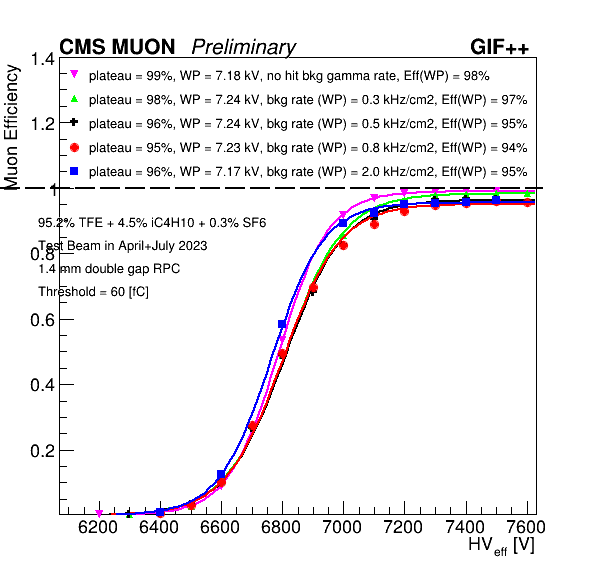

In [27]:

canvas_all = TCanvas("c_all", "c_all", 0, 0, 600, 600)

TGraphs_list_STDMX[0].GetHistogram().SetMaximum(1.4)
TGraphs_list_STDMX[0].SetTitle("")
TGraphs_list_STDMX[0].GetXaxis().SetTitle("HV_{eff} [V]")
TGraphs_list_STDMX[0].GetYaxis().SetTitle("Muon Efficiency")
TGraphs_list_STDMX[0].Draw("AP")
TGraphs_list_STDMX[1].Draw("PSAME")
TGraphs_list_STDMX[2].Draw("PSAME")
TGraphs_list_STDMX[3].Draw("PSAME")
TGraphs_list_STDMX[4].Draw("PSAME")

Emax_STDMX = []
Emax_err_STDMX = []
Lambda_STDMX = []
Lambda_err_STDMX = []
HV50_STDMX = []
HV50_err_STDMX = []
HV95_STDMX = []
HV95_err_STDMX = []

for sig in func_list_STDMX:
    Emax_ = 1 - math.sqrt((1 - sig.GetParameter(0)) * (1 - sig.GetParameter(0)))
    Emax_STDMX.append(Emax_)
    Emax_err_STDMX.append(sig.GetParError(0))     
    Lambda_STDMX.append(sig.GetParameter(1))  
    Lambda_err_STDMX.append(sig.GetParError(1))
    HV50_STDMX.append(sig.GetParameter(2))  
    HV50_err_STDMX.append(sig.GetParError(2)) 
    HV95_STDMX.append(sig.GetX(HV_ref))
    HV95_err_STDMX.append((math.log(19)/sig.GetParameter(1)**2)*sig.GetParError(1)+sig.GetParError(2))#errore HV95

WP_STDMX = []    

for Emax_, Lambda_, HV50_ in zip(Emax_STDMX, Lambda_STDMX, HV50_STDMX):
    WP_STDMX.append((HV50_ - math.log(1/0.95-1)/Lambda_ + 150.))

txt_STDMX_22 = Features_STDMX['noiseGammaRate'][2]/(Features_STDMX['gamma_CS'][2]*1000)
txt_STDMX_10 = Features_STDMX['noiseGammaRate'][4]/(Features_STDMX['gamma_CS'][4]*1000)
txt_STDMX_46 = Features_STDMX['noiseGammaRate'][5]/(Features_STDMX['gamma_CS'][5]*1000)
txt_STDMX_33 = Features_STDMX['noiseGammaRate'][7]/(Features_STDMX['gamma_CS'][7]*1000)

eff_1_STDMX = 'plateau = {a:.0%}, WP = {b:.2f} kV, no hit bkg gamma rate, Eff(WP) = {c:.0%}'.format(a=Emax_STDMX[0], b=WP_STDMX[0]/1000., c=(func_list_STDMX[0].Eval(WP_STDMX[0])));
eff_2_STDMX = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_STDMX[1], b=WP_STDMX[1]/1000., c=(func_list_STDMX[1].Eval(WP_STDMX[1])), d=txt_STDMX_22);
eff_3_STDMX = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_STDMX[2], b=WP_STDMX[2]/1000., c=(func_list_STDMX[2].Eval(WP_STDMX[2])), d=txt_STDMX_10);
eff_4_STDMX = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_STDMX[3], b=WP_STDMX[3]/1000., c=(func_list_STDMX[3].Eval(WP_STDMX[3])), d=txt_STDMX_46);
eff_5_STDMX = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_STDMX[4], b=WP_STDMX[4]/1000., c=(func_list_STDMX[4].Eval(WP_STDMX[4])), d=txt_STDMX_33);

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.1, 0.68, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.02376); 
legend.AddEntry(TGraphs_list_STDMX[0], eff_1_STDMX, "P");
legend.AddEntry(TGraphs_list_STDMX[1], eff_2_STDMX, "P");
legend.AddEntry(TGraphs_list_STDMX[2], eff_3_STDMX, "P");
legend.AddEntry(TGraphs_list_STDMX[3], eff_4_STDMX, "P");
legend.AddEntry(TGraphs_list_STDMX[4], eff_5_STDMX, "P");
legend.Draw();
canvas_all.Draw()

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.025);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(6000, 0.88, "95.2% TFE + 4.5% iC4H10 + 0.3% SF6");
ltx_data.DrawLatex(6000, 0.81, "Test Beam in April+July 2023");
ltx_data.DrawLatex(6000, 0.74, "1.4 mm double gap RPC");
ltx_data.DrawLatex(6000, 0.67, "Threshold = 60 [fC]");
'''
f3 = TF1("f3", "x", 0, 1.40);
A3 = TGaxis(5900, 0, 5900, 1.4, "f3", 510, "");
A3.SetTitle("Muon Efficiency [%]");
A3.SetLabelSize(0.03);
A3.SetTitleSize(0.03);
A3.SetTitleOffset(1.3);
A3.Draw();

f4 = TF1("f4", "x", 5.9, 7.7);
A4 = TGaxis(5900, 0, 7700, 0, "f4", 510, "");
A4.SetTitle("HV_{eff} [kV]");
A4.SetLabelSize(0.03);
A4.SetTitleSize(0.03);
A4.Draw();
'''
line = TLine(5850, 1., 7650, 1.);
line.SetLineColor(1);
line.SetLineStyle(9);
line.SetLineWidth(2);
line.Draw();

canvas_all.cd()
canvas_all.SaveAs("STDMX_eff.png")
canvas_all.SaveAs("STDMX_eff.pdf")
#canvas_all.SaveAs("Comp_AND_RPC22_SourceON_RES_CORR.pdf")


In [28]:
"""
canvas_all = TCanvas("c_all", "c_all", 0, 0, 600, 600)
p1 = ROOT.TPad("p1", "", 0, 0, 1, 1);
p2 = ROOT.TPad("p2", "", 0, 0, 1, 1);
p2.SetFillStyle(4000);
p2.Draw();
p2.cd();
_STDMX_22.Draw() 

tfont = _STDMX_22.GetHistogram().GetYaxis().GetTitleFont();
tsize = _STDMX_22.GetHistogram().GetYaxis().GetTitleSize();
lfont = _STDMX_22.GetHistogram().GetYaxis().GetLabelFont();
lsize = _STDMX_22.GetHistogram().GetYaxis().GetLabelSize();
  
xmin = p2.GetUxmin();
xmax = p2.GetUxmax();
dx = (xmax - xmin) / 0.8; # 10 percent margins left and right
ymin = TGraphs_list_STDMX[0].GetHistogram().GetMinimum();
ymax = TGraphs_list_STDMX[0].GetHistogram().GetMaximum();
dy = (ymax - ymin) / 0.8; # 10 percent margins top and bottom
p1.Range(xmin-0.1*dx, ymin-0.1*dy, xmax+0.1*dx, ymax+0.1*dy);

p1.Draw();
p1.cd();
TGraphs_list_STDMX[0].GetHistogram().SetMaximum(1.4)
TGraphs_list_STDMX[0].SetTitle("")
TGraphs_list_STDMX[0].GetXaxis().SetTitle("HV_{eff} [V]")
TGraphs_list_STDMX[0].GetYaxis().SetTitle("Muon Efficiency")
TGraphs_list_STDMX[0].Draw("AP")
TGraphs_list_STDMX[1].Draw("PSAME")
TGraphs_list_STDMX[2].Draw("PSAME")
TGraphs_list_STDMX[3].Draw("PSAME")
TGraphs_list_STDMX[4].Draw("PSAME")

Emax_STDMX = []
Emax_err_STDMX = []
Lambda_STDMX = []
Lambda_err_STDMX = []
HV50_STDMX = []
HV50_err_STDMX = []
HV95_STDMX = []
HV95_err_STDMX = []

for sig in func_list_STDMX:
    Emax_ = 1 - math.sqrt((1 - sig.GetParameter(0)) * (1 - sig.GetParameter(0)))
    Emax_STDMX.append(Emax_)
    Emax_err_STDMX.append(sig.GetParError(0))     
    Lambda_STDMX.append(sig.GetParameter(1))  
    Lambda_err_STDMX.append(sig.GetParError(1))
    HV50_STDMX.append(sig.GetParameter(2))  
    HV50_err_STDMX.append(sig.GetParError(2)) 
    HV95_STDMX.append(sig.GetX(HV_ref))
    HV95_err_STDMX.append((math.log(19)/sig.GetParameter(1)**2)*sig.GetParError(1)+sig.GetParError(2))#errore HV95

WP_STDMX = []    

for Emax_, Lambda_, HV50_ in zip(Emax_STDMX, Lambda_STDMX, HV50_STDMX):
    WP_STDMX.append((HV50_ - math.log(1/0.95-1)/Lambda_ + 150.))

txt_STDMX_22 = Features_STDMX['noiseGammaRate'][1]/(Features_STDMX['gamma_CS'][1]*1000)
txt_STDMX_10 = Features_STDMX['noiseGammaRate'][2]/(Features_STDMX['gamma_CS'][2]*1000)
txt_STDMX_46 = Features_STDMX['noiseGammaRate'][4]/(Features_STDMX['gamma_CS'][4]*1000)
txt_STDMX_33 = Features_STDMX['noiseGammaRate'][5]/(Features_STDMX['gamma_CS'][5]*1000)

eff_1_STDMX = 'plateau = {a:.0%}, WP = {b:.2f} kV, no hit bkg gamma rate, Eff(WP) = {c:.0%}'.format(a=Emax_STDMX[0], b=WP_STDMX[0]/1000., c=(func_list_STDMX[0].Eval(WP_STDMX[0])));
eff_2_STDMX = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_STDMX[1], b=WP_STDMX[1]/1000., c=(func_list_STDMX[1].Eval(WP_STDMX[1])), d=txt_STDMX_22);
eff_3_STDMX = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_STDMX[2], b=WP_STDMX[2]/1000., c=(func_list_STDMX[2].Eval(WP_STDMX[2])), d=txt_STDMX_10);
eff_4_STDMX = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_STDMX[3], b=WP_STDMX[3]/1000., c=(func_list_STDMX[3].Eval(WP_STDMX[3])), d=txt_STDMX_46);
eff_5_STDMX = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_STDMX[4], b=WP_STDMX[4]/1000., c=(func_list_STDMX[4].Eval(WP_STDMX[4])), d=txt_STDMX_33);

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.1, 0.68, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.02376); 
legend.AddEntry(TGraphs_list_STDMX[0], eff_1_STDMX, "P");
legend.AddEntry(TGraphs_list_STDMX[1], eff_2_STDMX, "P");
legend.AddEntry(TGraphs_list_STDMX[2], eff_3_STDMX, "P");
legend.AddEntry(TGraphs_list_STDMX[3], eff_4_STDMX, "P");
legend.AddEntry(TGraphs_list_STDMX[4], eff_5_STDMX, "P");
legend.Draw();
canvas_all.Draw()

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.025);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(6000, 0.88, "95.2% TFE + 4.5% iC4H10 + 0.3% SF6");
ltx_data.DrawLatex(6000, 0.81, "Test Beam in April+July 2023");
ltx_data.DrawLatex(6000, 0.74, "1.4 mm double gap RPC");
ltx_data.DrawLatex(6000, 0.67, "Threshold = 60 [fC]");
'''
f3 = TF1("f3", "x", 0, 1.40);
A3 = TGaxis(5900, 0, 5900, 1.4, "f3", 510, "");
A3.SetTitle("Muon Efficiency [%]");
A3.SetLabelSize(0.03);
A3.SetTitleSize(0.03);
A3.SetTitleOffset(1.3);
A3.Draw();

f4 = TF1("f4", "x", 5.9, 7.7);
A4 = TGaxis(5900, 0, 7700, 0, "f4", 510, "");
A4.SetTitle("HV_{eff} [kV]");
A4.SetLabelSize(0.03);
A4.SetTitleSize(0.03);
A4.Draw();
'''
line = TLine(5850, 1., 7650, 1.);
line.SetLineColor(1);
line.SetLineStyle(9);
line.SetLineWidth(2);
line.Draw();

canvas_all.cd()
canvas_all.SaveAs("STDMX_eff.png")
canvas_all.SaveAs("STDMX_eff.pdf")
#canvas_all.SaveAs("Comp_AND_RPC22_SourceON_RES_CORR.pdf")
"""

'\ncanvas_all = TCanvas("c_all", "c_all", 0, 0, 600, 600)\np1 = ROOT.TPad("p1", "", 0, 0, 1, 1);\np2 = ROOT.TPad("p2", "", 0, 0, 1, 1);\np2.SetFillStyle(4000);\np2.Draw();\np2.cd();\n_STDMX_22.Draw() \n\ntfont = _STDMX_22.GetHistogram().GetYaxis().GetTitleFont();\ntsize = _STDMX_22.GetHistogram().GetYaxis().GetTitleSize();\nlfont = _STDMX_22.GetHistogram().GetYaxis().GetLabelFont();\nlsize = _STDMX_22.GetHistogram().GetYaxis().GetLabelSize();\n  \nxmin = p2.GetUxmin();\nxmax = p2.GetUxmax();\ndx = (xmax - xmin) / 0.8; # 10 percent margins left and right\nymin = TGraphs_list_STDMX[0].GetHistogram().GetMinimum();\nymax = TGraphs_list_STDMX[0].GetHistogram().GetMaximum();\ndy = (ymax - ymin) / 0.8; # 10 percent margins top and bottom\np1.Range(xmin-0.1*dx, ymin-0.1*dy, xmax+0.1*dx, ymax+0.1*dy);\n\np1.Draw();\np1.cd();\nTGraphs_list_STDMX[0].GetHistogram().SetMaximum(1.4)\nTGraphs_list_STDMX[0].SetTitle("")\nTGraphs_list_STDMX[0].GetXaxis().SetTitle("HV_{eff} [V]")\nTGraphs_list_STDMX[0].

In [29]:
TGraphs_list_30CO2 = []
func_list_30CO2 = []

canvas = TCanvas("c", "c", 564, 232, 600, 600)
HV_ref= 95

for scan, sigmoid, color, marker in scans_30CO2:
    n = len(HVCurrentDataFrame(scans[scan])['HV_top'])
        
    gr_E = TGraphErrors(n, 
                    HVCurrentDataFrame(scans[scan])['HV_top'].values, 
                    HVCurrentDataFrame(scans[scan])['efficiency'].values,
                    HVCurrentDataFrame(scans[scan])['deltaV_err'].values,
                    HVCurrentDataFrame(scans[scan])['eff_error'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
    gr_E.Fit(sigmoid) # FIT the graph with the sigmoid
    sigmoid.SetLineColor(color)
    gr_E.SetMarkerColor(color)
    gr_E.SetMarkerStyle(marker)
    #estrazione valori da fit
    sig= gr_E.GetFunction("sigmoid"+str(k))
    sig.SetLineColor(color)    

    Emax=sig.GetParameter(0)
    Emax_err=sig.GetParError(0)     

    Lambda=sig.GetParameter(1)    
    Lambda_err=sig.GetParError(1)      

    HV50=sig.GetParameter(2)     
    HV50_err=sig.GetParError(2)      

    HV95=sig.GetX(HV_ref)     
    HV95_err= math.sqrt(((math.log(19)/Lambda**2)*Lambda_err)**2 + HV50_err**2) #errore HV95
    print("Lambda = ", Lambda)
    #check print efficiency curves fitted
    TGraphs_list_30CO2.append(gr_E)
    func_list_30CO2.append(sig)
    gr_E.Draw("AP")
    k=k+1
    #canvas.Draw()
    canvas.SaveAs(scan+".png")
    canvas.SaveAs(scan+".pdf")

Lambda =  0.01051168869916845
Lambda =  0.010634440072906525
Lambda =  0.010700471914378704
Lambda =  0.00429551367136277
Lambda =  0.011956342060377195
 FCN=237.917 FROM MIGRAD    STATUS=CONVERGED     107 CALLS         108 TOTAL
                     EDM=6.56939e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Emax         9.92760e-01   5.62069e-04   4.09074e-06   9.82105e-02
   2  Lambda       1.05117e-02   9.71471e-05   6.83995e-07   1.01174e+00
   3  HV50         6.64661e+03   1.66246e+00   1.17444e-02   4.65354e-05
 FCN=106.05 FROM MIGRAD    STATUS=CONVERGED      88 CALLS          89 TOTAL
                     EDM=8.558e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Emax         9.78486e-0

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3001] Required argument not present
Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3001] Required argument not present
Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3001] Required argument not present
Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3001] Required argument not present
Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3001] Required argument not present
Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3001] Required argument not present
Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3001] Required argument not present
Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3001] Required argument not present
Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3001

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_all
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 5840 xmax = 7760 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [5839.999892,7760.001189] is not a valid interval
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 5934.88 xmax = 7916.29 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [5934.883016,7916.286824] is not a valid interval
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 5639.79 xmax = 7562.26 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in 

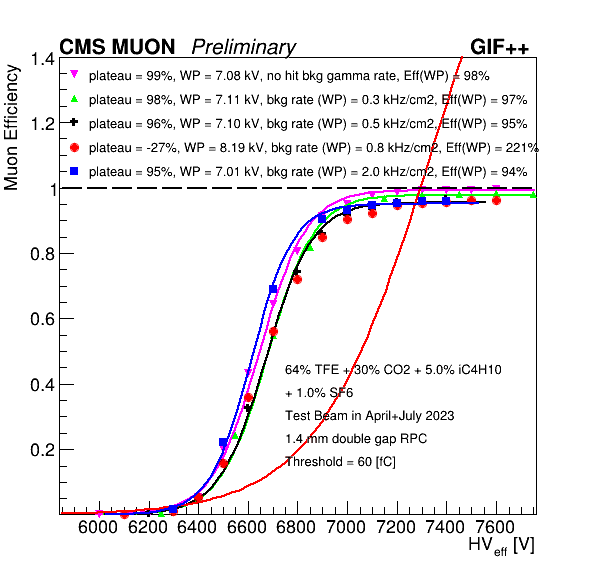

In [30]:
canvas_all = TCanvas("c_all", "c_all", 0, 0, 600, 600)
TGraphs_list_30CO2[0].GetHistogram().SetMaximum(1.4)
TGraphs_list_30CO2[0].SetTitle("")
TGraphs_list_30CO2[0].GetXaxis().SetTitle("HV_{eff} [V]")
TGraphs_list_30CO2[0].GetYaxis().SetTitle("Muon Efficiency")
TGraphs_list_30CO2[0].Draw("AP")
TGraphs_list_30CO2[1].Draw("PSAME")
TGraphs_list_30CO2[2].Draw("PSAME")
TGraphs_list_30CO2[3].Draw("PSAME")
TGraphs_list_30CO2[4].Draw("PSAME")

Emax_30CO2 = []
Emax_err_30CO2 = []
Lambda_30CO2 = []
Lambda_err_30CO2 = []
HV50_30CO2 = []
HV50_err_30CO2 = []
HV95_30CO2 = []
HV95_err_30CO2 = []

for sig in func_list_30CO2:
    Emax_ = 1 - math.sqrt((1 - sig.GetParameter(0)) * (1 - sig.GetParameter(0)))
    Emax_30CO2.append(Emax_)
    Emax_err_30CO2.append(sig.GetParError(0))     
    Lambda_30CO2.append(sig.GetParameter(1))  
    Lambda_err_30CO2.append(sig.GetParError(1))
    HV50_30CO2.append(sig.GetParameter(2))  
    HV50_err_30CO2.append(sig.GetParError(2)) 
    HV95_30CO2.append(sig.GetX(HV_ref))
    HV95_err_30CO2.append((math.log(19)/sig.GetParameter(1)**2)*sig.GetParError(1)+sig.GetParError(2))#errore HV95

WP_30CO2 = []    

for Emax_, Lambda_, HV50_ in zip(Emax_30CO2, Lambda_30CO2, HV50_30CO2):
    WP_30CO2.append((HV50_ - math.log(1/0.95-1)/Lambda_ + 150.))

txt_30CO2_22 = Features_30CO2['noiseGammaRate'][2]/(Features_30CO2['gamma_CS'][2]*1000)
txt_30CO2_10 = Features_30CO2['noiseGammaRate'][4]/(Features_30CO2['gamma_CS'][4]*1000)
txt_30CO2_46 = Features_30CO2['noiseGammaRate'][5]/(Features_30CO2['gamma_CS'][5]*1000)
txt_30CO2_33 = Features_30CO2['noiseGammaRate'][7]/(Features_30CO2['gamma_CS'][7]*1000)
    
eff_1_30CO2 = 'plateau = {a:.0%}, WP = {b:.2f} kV, no hit bkg gamma rate, Eff(WP) = {c:.0%}'.format(a=Emax_30CO2[0], b=WP_30CO2[0]/1000., c=(func_list_30CO2[0].Eval(WP_30CO2[0])));
eff_2_30CO2 = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_30CO2[1], b=WP_30CO2[1]/1000., c=(func_list_30CO2[1].Eval(WP_30CO2[1])), d=txt_30CO2_22);
eff_3_30CO2 = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_30CO2[2], b=WP_30CO2[2]/1000., c=(func_list_30CO2[2].Eval(WP_30CO2[2])), d=txt_30CO2_10);
eff_4_30CO2 = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_30CO2[3], b=WP_30CO2[3]/1000., c=(func_list_30CO2[3].Eval(WP_30CO2[3])), d=txt_30CO2_46);
eff_5_30CO2 = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_30CO2[4], b=WP_30CO2[4]/1000., c=(func_list_30CO2[4].Eval(WP_30CO2[4])), d=txt_30CO2_33);

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.1, 0.68, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.02376); 
legend.AddEntry(TGraphs_list_30CO2[0], eff_1_30CO2, "P");
legend.AddEntry(TGraphs_list_30CO2[1], eff_2_30CO2, "P");
legend.AddEntry(TGraphs_list_30CO2[2], eff_3_30CO2, "P");
legend.AddEntry(TGraphs_list_30CO2[3], eff_4_30CO2, "P");
legend.AddEntry(TGraphs_list_30CO2[4], eff_5_30CO2, "P");
legend.Draw();
canvas_all.Draw()

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.025);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(6750, 0.43, "64% TFE + 30% CO2 + 5.0% iC4H10");
ltx_data.DrawLatex(6750, 0.36, "+ 1.0% SF6");
ltx_data.DrawLatex(6750, 0.29, "Test Beam in April+July 2023");
ltx_data.DrawLatex(6750, 0.22, "1.4 mm double gap RPC");
ltx_data.DrawLatex(6750, 0.15, "Threshold = 60 [fC]");

'''
f3 = TF1("f3", "x", 0, 1.40);
A3 = TGaxis(5900, 0, 5900, 1.4, "f3", 510, "");
A3.SetTitle("Muon Efficiency [%]");
A3.SetLabelSize(0.03);
A3.SetTitleSize(0.03);
A3.SetTitleOffset(1.3);
A3.Draw();

f4 = TF1("f4", "x", 5.9, 7.7);
A4 = TGaxis(5900, 0, 7700, 0, "f4", 510, "");
A4.SetTitle("HV_{eff} [kV]");
A4.SetLabelSize(0.03);
A4.SetTitleSize(0.03);
A4.Draw();
'''
line = TLine(5850, 1., 7750, 1.);
line.SetLineColor(1);
line.SetLineStyle(9);
line.SetLineWidth(2);
line.Draw();

canvas_all.SaveAs("30CO2_Eff.png")
canvas_all.SaveAs("30CO2_Eff.pdf")
#canvas_all.SaveAs("Comp_AND_RPC22_SourceON_RES_CORR.pdf")

In [31]:
TGraphs_list_40CO2 = []
func_list_40CO2 = []

canvas = TCanvas("c", "c", 564, 232, 600, 600)
HV_ref= 95

for scan, sigmoid, color, marker in scans_40CO2:
    n = len(HVCurrentDataFrame(scans[scan])['HV_top'])
        
    gr_E = TGraphErrors(n, 
                    HVCurrentDataFrame(scans[scan])['HV_top'].values, 
                    HVCurrentDataFrame(scans[scan])['efficiency'].values,
                    - HVCurrentDataFrame(scans[scan])['deltaV_err'].values,
                    HVCurrentDataFrame(scans[scan])['eff_error'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
    gr_E.Fit(sigmoid) # FIT the graph with the sigmoid
    sigmoid.SetLineColor(color)
    gr_E.SetMarkerColor(color)
    gr_E.SetMarkerStyle(marker)
    #estrazione valori da fit
    sig= gr_E.GetFunction("sigmoid"+str(k))
    sig.SetLineColor(color)    

    Emax=sig.GetParameter(0)
    Emax_err=sig.GetParError(0)     

    Lambda=sig.GetParameter(1)    
    Lambda_err=sig.GetParError(1)      

    HV50=sig.GetParameter(2)     
    HV50_err=sig.GetParError(2)      

    HV95=sig.GetX(HV_ref)     
    HV95_err= math.sqrt(((math.log(19)/Lambda**2)*Lambda_err)**2 + HV50_err**2) #errore HV95
    print(HV95_err)

    #check print efficiency curves fitted
    TGraphs_list_40CO2.append(gr_E)
    func_list_40CO2.append(sig)
    gr_E.Draw("AP")
    k=k+1
    #canvas.Draw()
    canvas.SaveAs(scan+".png")
    canvas.SaveAs(scan+".pdf")

3.217707403960694
3.3052370210603743
3.2625177335868227
3.296591381109523
2.9668371791336696
 FCN=153.726 FROM MIGRAD    STATUS=CONVERGED     385 CALLS         386 TOTAL
                     EDM=4.57482e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   3.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Emax         9.89922e-01   6.35095e-04   1.04201e-05  -1.32445e-01
   2  Lambda       9.84204e-03   8.96623e-05  -1.33742e-06  -1.00996e+00
   3  HV50         6.54214e+03   1.71039e+00  -3.68621e-03  -4.01223e-05
 FCN=137.477 FROM MIGRAD    STATUS=CONVERGED     109 CALLS         110 TOTAL
                     EDM=9.48626e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Emax         9.76833e-01   1.08508e-03   5.77158e-06  -6.70903e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 5840 xmax = 7760 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [5840.000000,7760.000000] is not a valid interval
Info in <TCanvas::Print>: png file 40CO2_OFF.png has been created
Info in <TCanvas::Print>: pdf file 40CO2_OFF.pdf has been created
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 5640 xmax = 7560 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [5640.000000,7560.000000] is not a valid interval
Info in <TCanvas::Print>: png file 40CO2_22.png has been created
Info in <TCanvas::Print>: pdf file 40CO2_22.pdf has been created
Info in <ROOT::Ma

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_all
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 5840 xmax = 7760 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [5840.000000,7760.000000] is not a valid interval
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 5640 xmax = 7560 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [5640.000000,7560.000000] is not a valid interval
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 5640 xmax = 7560 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>:

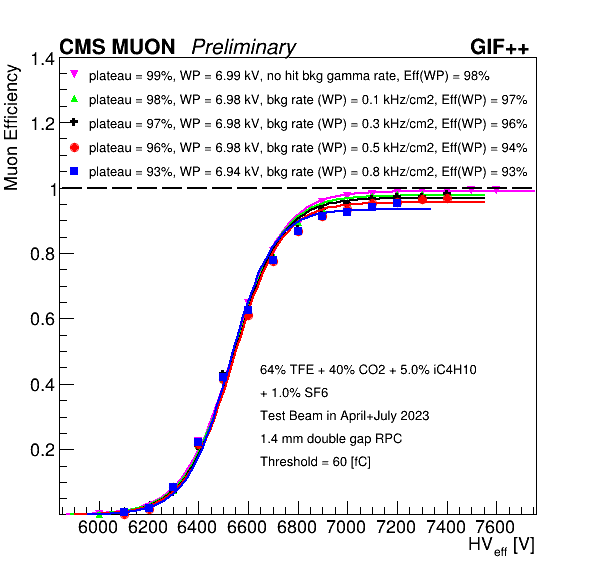

In [32]:
canvas_all = TCanvas("c_all", "c_all", 0, 0, 600, 600)
TGraphs_list_40CO2[0].GetHistogram().SetMaximum(1.4)
TGraphs_list_40CO2[0].SetTitle("")
TGraphs_list_40CO2[0].GetXaxis().SetTitle("HV_{eff} [V]")
TGraphs_list_40CO2[0].GetYaxis().SetTitle("Muon Efficiency")
TGraphs_list_40CO2[0].Draw("AP")
TGraphs_list_40CO2[1].Draw("PSAME")
TGraphs_list_40CO2[2].Draw("PSAME")
TGraphs_list_40CO2[3].Draw("PSAME")
TGraphs_list_40CO2[4].Draw("PSAME")

Emax_40CO2 = []
Emax_err_40CO2 = []
Lambda_40CO2 = []
Lambda_err_40CO2 = []
HV50_40CO2 = []
HV50_err_40CO2 = []
HV95_40CO2 = []
HV95_err_40CO2 = []

for sig in func_list_40CO2:
    Emax_ = 1 - math.sqrt((1 - sig.GetParameter(0)) * (1 - sig.GetParameter(0)))
    Emax_40CO2.append(Emax_)
    Emax_err_40CO2.append(sig.GetParError(0))     
    Lambda_40CO2.append(sig.GetParameter(1))  
    Lambda_err_40CO2.append(sig.GetParError(1))
    HV50_40CO2.append(sig.GetParameter(2))  
    HV50_err_40CO2.append(sig.GetParError(2)) 
    HV95_40CO2.append(sig.GetX(HV_ref))
    HV95_err_40CO2.append((math.log(19)/sig.GetParameter(1)**2)*sig.GetParError(1)+sig.GetParError(2))#errore HV95

WP_40CO2 = []    

for Emax_, Lambda_, HV50_ in zip(Emax_40CO2, Lambda_40CO2, HV50_40CO2):
    WP_40CO2.append((HV50_ - math.log(1/0.95-1)/Lambda_ + 150.))

txt_40CO2_22 = Features_40CO2['noiseGammaRate'][1]/(Features_40CO2['gamma_CS'][1]*1000)
txt_40CO2_10 = Features_40CO2['noiseGammaRate'][2]/(Features_40CO2['gamma_CS'][2]*1000)
txt_40CO2_46 = Features_40CO2['noiseGammaRate'][4]/(Features_40CO2['gamma_CS'][4]*1000)
txt_40CO2_33 = Features_40CO2['noiseGammaRate'][5]/(Features_40CO2['gamma_CS'][5]*1000)
    
eff_1_40CO2 = 'plateau = {a:.0%}, WP = {b:.2f} kV, no hit bkg gamma rate, Eff(WP) = {c:.0%}'.format(a=Emax_40CO2[0], b=WP_40CO2[0]/1000., c=(func_list_40CO2[0].Eval(WP_40CO2[0])));
eff_2_40CO2 = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_40CO2[1], b=WP_40CO2[1]/1000., c=(func_list_40CO2[1].Eval(WP_40CO2[1])), d=txt_40CO2_22);
eff_3_40CO2 = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_40CO2[2], b=WP_40CO2[2]/1000., c=(func_list_40CO2[2].Eval(WP_40CO2[2])), d=txt_40CO2_10);
eff_4_40CO2 = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_40CO2[3], b=WP_40CO2[3]/1000., c=(func_list_40CO2[3].Eval(WP_40CO2[3])), d=txt_40CO2_46);
eff_5_40CO2 = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_40CO2[4], b=WP_40CO2[4]/1000., c=(func_list_40CO2[4].Eval(WP_40CO2[4])), d=txt_40CO2_33);

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.1, 0.68, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.02376); 
legend.AddEntry(TGraphs_list_40CO2[0], eff_1_40CO2, "P");
legend.AddEntry(TGraphs_list_40CO2[1], eff_2_40CO2, "P");
legend.AddEntry(TGraphs_list_40CO2[2], eff_3_40CO2, "P");
legend.AddEntry(TGraphs_list_40CO2[3], eff_4_40CO2, "P");
legend.AddEntry(TGraphs_list_40CO2[4], eff_5_40CO2, "P");
legend.Draw();
canvas_all.Draw()

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.025);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(6650, 0.43, "64% TFE + 40% CO2 + 5.0% iC4H10");
ltx_data.DrawLatex(6650, 0.36, "+ 1.0% SF6");
ltx_data.DrawLatex(6650, 0.29, "Test Beam in April+July 2023");
ltx_data.DrawLatex(6650, 0.22, "1.4 mm double gap RPC");
ltx_data.DrawLatex(6650, 0.15, "Threshold = 60 [fC]");

'''
f3 = TF1("f3", "x", 0, 1.40);
A3 = TGaxis(5900, 0, 5900, 1.4, "f3", 510, "");
A3.SetTitle("Muon Efficiency [%]");
A3.SetLabelSize(0.03);
A3.SetTitleSize(0.03);
A3.SetTitleOffset(1.3);
A3.Draw();

f4 = TF1("f4", "x", 5.9, 7.7);
A4 = TGaxis(5900, 0, 7700, 0, "f4", 510, "");
A4.SetTitle("HV_{eff} [kV]");
A4.SetLabelSize(0.03);
A4.SetTitleSize(0.03);
A4.Draw();
'''
line = TLine(5850, 1., 7750, 1.);
line.SetLineColor(1);
line.SetLineStyle(9);
line.SetLineWidth(2);
line.Draw();

canvas_all.SaveAs("40CO2_Eff.png")
canvas_all.SaveAs("40CO2_Eff.pdf")
#canvas_all.SaveAs("Comp_AND_RPC22_SourceON_RES_CORR.pdf")

In [33]:
TGraphs_list_30CO205SF6 = []
func_list_30CO205SF6 = []

canvas = TCanvas("c", "c", 564, 232, 600, 600)
HV_ref= 95
k=16
for scan, sigmoid, color, marker in scans_30CO205SF6:
    n = len(HVCurrentDataFrame(scans[scan])['HV_top'])
        
    gr_E = TGraphErrors(n, 
                    HVCurrentDataFrame(scans[scan])['HV_top'].values, 
                    HVCurrentDataFrame(scans[scan])['efficiency'].values,
                    HVCurrentDataFrame(scans[scan])['deltaV_err'].values,
                    HVCurrentDataFrame(scans[scan])['eff_error'].values) #values from df[].values to convert dataframe object in array suitable for the tgraph
    gr_E.Fit(sigmoid) # FIT the graph with the sigmoid
    sigmoid.SetLineColor(color)
    gr_E.SetMarkerColor(color)
    gr_E.SetMarkerStyle(marker)
    #estrazione valori da fit
    sig= gr_E.GetFunction("sigmoid"+str(k))
    sig.SetLineColor(color)    

    Emax=sig.GetParameter(0)
    Emax_err=sig.GetParError(0)     

    Lambda=sig.GetParameter(1)    
    Lambda_err=sig.GetParError(1)      

    HV50=sig.GetParameter(2)     
    HV50_err=sig.GetParError(2)      

    HV95=sig.GetX(HV_ref)     
    HV95_err= math.sqrt(((math.log(19)/Lambda**2)*Lambda_err)**2 + HV50_err**2) #errore HV95
    print(HV95_err)
    #check print efficiency curves fitted
    TGraphs_list_30CO205SF6.append(gr_E)
    func_list_30CO205SF6.append(sig)
    gr_E.Draw("AP")
    k=k+1
    #canvas.Draw()
    canvas.SaveAs(scan+".png")
    canvas.SaveAs(scan+".pdf")

3.2207719076987207
4.6366793045507375
4.501655076060549
4.166723782954413
4.1572558763335845
 FCN=140.095 FROM MIGRAD    STATUS=CONVERGED     112 CALLS         113 TOTAL
                     EDM=5.98312e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Emax         9.90108e-01   8.11717e-04   4.37540e-06   1.32260e+00
   2  Lambda       9.87880e-03   8.93090e-05   4.78142e-07  -2.77190e-01
   3  HV50         6.51358e+03   1.76427e+00   9.52703e-03  -3.80945e-04
 FCN=65.8588 FROM MIGRAD    STATUS=CONVERGED     140 CALLS         141 TOTAL
                     EDM=1.01099e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Emax         9.72180e-01   1.72799e-03   6.34061e-06  -6.38366e-01
   2  Lambda 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 5815 xmax = 7435.01 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [5814.999463,7435.005908] is not a valid interval
Info in <TCanvas::Print>: png file 30CO205SF6_OFF.png has been created
Info in <TCanvas::Print>: pdf file 30CO205SF6_OFF.pdf has been created
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 5814.89 xmax = 7436.18 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [5814.893113,7436.175756] is not a valid interval
Info in <TCanvas::Print>: png file 30CO205SF6_10.png has been created
Info in <TCanvas::Print>: pdf file 30CO205SF6_10.pdf has b

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_all
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 5815 xmax = 7435.01 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [5814.999463,7435.005908] is not a valid interval
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 5814.89 xmax = 7436.18 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error in <TF1::GetX>: [5814.893113,7436.175756] is not a valid interval
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 5814.78 xmax = 7437.23 npts = 100
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Error 

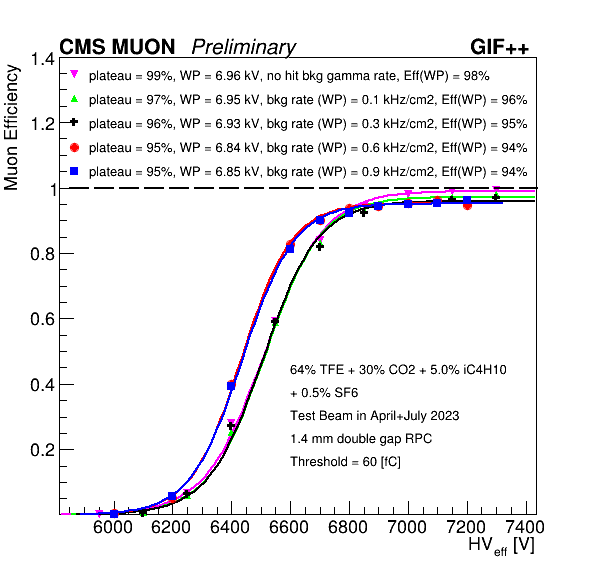

In [34]:
canvas_all = TCanvas("c_all", "c_all", 0, 0, 600, 600)
TGraphs_list_30CO205SF6[0].GetHistogram().SetMaximum(1.4)
TGraphs_list_30CO205SF6[0].SetTitle("")
TGraphs_list_30CO205SF6[0].GetXaxis().SetTitle("HV_{eff} [V]")
TGraphs_list_30CO205SF6[0].GetYaxis().SetTitle("Muon Efficiency")
TGraphs_list_30CO205SF6[0].Draw("AP")
TGraphs_list_30CO205SF6[1].Draw("PSAME")
TGraphs_list_30CO205SF6[2].Draw("PSAME")
TGraphs_list_30CO205SF6[3].Draw("PSAME")
TGraphs_list_30CO205SF6[4].Draw("PSAME")

Emax_30CO205SF6 = []
Emax_err_30CO205SF6 = []
Lambda_30CO205SF6 = []
Lambda_err_30CO205SF6 = []
HV50_30CO205SF6 = []
HV50_err_30CO205SF6 = []
HV95_30CO205SF6 = []
HV95_err_30CO205SF6 = []

for sig in func_list_30CO205SF6:
    Emax_ = 1 - math.sqrt((1 - sig.GetParameter(0)) * (1 - sig.GetParameter(0)))
    Emax_30CO205SF6.append(Emax_)
    Emax_err_30CO205SF6.append(sig.GetParError(0))     
    Lambda_30CO205SF6.append(sig.GetParameter(1))  
    Lambda_err_30CO205SF6.append(sig.GetParError(1))
    HV50_30CO205SF6.append(sig.GetParameter(2))  
    HV50_err_30CO205SF6.append(sig.GetParError(2)) 
    HV95_30CO205SF6.append(sig.GetX(HV_ref))
    HV95_err_30CO205SF6.append((math.log(19)/sig.GetParameter(1)**2)*sig.GetParError(1)+sig.GetParError(2))#errore HV95

WP_30CO205SF6 = []    

for Emax_, Lambda_, HV50_ in zip(Emax_30CO205SF6, Lambda_30CO205SF6, HV50_30CO205SF6):
    WP_30CO205SF6.append((HV50_ - math.log(1/0.95-1)/Lambda_ + 150.))


txt_30CO205SF6_22 = Features_30CO205SF6['noiseGammaRate'][1]/(Features_30CO205SF6['gamma_CS'][1]*1000)
txt_30CO205SF6_10 = Features_30CO205SF6['noiseGammaRate'][2]/(Features_30CO205SF6['gamma_CS'][2]*1000)
txt_30CO205SF6_46 = Features_30CO205SF6['noiseGammaRate'][4]/(Features_30CO205SF6['gamma_CS'][4]*1000)
txt_30CO205SF6_33 = Features_30CO205SF6['noiseGammaRate'][5]/(Features_30CO205SF6['gamma_CS'][5]*1000)
    
eff_1_30CO205SF6 = 'plateau = {a:.0%}, WP = {b:.2f} kV, no hit bkg gamma rate, Eff(WP) = {c:.0%}'.format(a=Emax_30CO205SF6[0], b=WP_30CO205SF6[0]/1000., c=(func_list_30CO205SF6[0].Eval(WP_30CO205SF6[0])));
eff_2_30CO205SF6 = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_30CO205SF6[1], b=WP_30CO205SF6[1]/1000., c=(func_list_30CO205SF6[1].Eval(WP_30CO205SF6[1])), d=txt_30CO205SF6_22 );
eff_3_30CO205SF6 = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_30CO205SF6[2], b=WP_30CO205SF6[2]/1000., c=(func_list_30CO205SF6[2].Eval(WP_30CO205SF6[2])), d=txt_30CO205SF6_10 );
eff_4_30CO205SF6 = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_30CO205SF6[3], b=WP_30CO205SF6[3]/1000., c=(func_list_30CO205SF6[3].Eval(WP_30CO205SF6[3])), d=txt_30CO205SF6_46 );
eff_5_30CO205SF6 = 'plateau = {a:.0%}, WP = {b:.2f} kV, bkg rate (WP) = {d:.1f} kHz/cm2, Eff(WP) = {c:.0%}'.format(a=Emax_30CO205SF6[4], b=WP_30CO205SF6[4]/1000., c=(func_list_30CO205SF6[4].Eval(WP_30CO205SF6[4])), d=txt_30CO205SF6_33 );

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.1, 0.68, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.02376); 
legend.AddEntry(TGraphs_list_30CO205SF6[0], eff_1_30CO205SF6, "P");
legend.AddEntry(TGraphs_list_30CO205SF6[1], eff_2_30CO205SF6, "P");
legend.AddEntry(TGraphs_list_30CO205SF6[2], eff_3_30CO205SF6, "P");
legend.AddEntry(TGraphs_list_30CO205SF6[3], eff_4_30CO205SF6, "P");
legend.AddEntry(TGraphs_list_30CO205SF6[4], eff_5_30CO205SF6, "P");
legend.Draw();
canvas_all.Draw()

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.025);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(6600, 0.43, "64% TFE + 30% CO2 + 5.0% iC4H10");
ltx_data.DrawLatex(6600, 0.36, "+ 0.5% SF6");
ltx_data.DrawLatex(6600, 0.29, "Test Beam in April+July 2023");
ltx_data.DrawLatex(6600, 0.22, "1.4 mm double gap RPC");
ltx_data.DrawLatex(6600, 0.15, "Threshold = 60 [fC]");


'''
f3 = TF1("f3", "x", 0, 1.40);
A3 = TGaxis(5900, 0, 5900, 1.4, "f3", 510, "");
A3.SetTitle("Muon Efficiency [%]");
A3.SetLabelSize(0.03);
A3.SetTitleSize(0.03);
A3.SetTitleOffset(1.3);
A3.Draw();

f4 = TF1("f4", "x", 5.9, 7.7);
A4 = TGaxis(5900, 0, 7700, 0, "f4", 510, "");
A4.SetTitle("HV_{eff} [kV]");
A4.SetLabelSize(0.03);
A4.SetTitleSize(0.03);
A4.Draw();
'''
line = TLine(5850, 1., 7440, 1.);
line.SetLineColor(1);
line.SetLineStyle(9);
line.SetLineWidth(2);
line.Draw();

canvas_all.SaveAs("30CO205SF6_Eff.png")
canvas_all.SaveAs("30CO205SF6_Eff.pdf")
#canvas_all.SaveAs("Comp_AND_RPC22_SourceON_RES_CORR.pdf")

In [35]:
canvas = TCanvas("c", "c", 564, 232, 600, 600)

print(Features_40CO2['WP'].values/1000)
print(Features_40CO2['WP_err'].values/1000)
    
_40CO2 = TGraphErrors(6, 
                   Features_40CO2['noiseGammaRate'].values/(Features_40CO2['gamma_CS'].values*1000), 
                   Features_40CO2['WP'].values/1000,
                   0,
                   Features_40CO2['WP_err'].values/1000) #values from df[].values to convert dataframe object in array suitable for the tgraph
_40CO2.SetMarkerColor(2)
_40CO2.SetMarkerStyle(20)

_30CO2 = TGraphErrors(6, 
                   Features_30CO2['noiseGammaRate'].values/(Features_30CO2['gamma_CS'].values*1000), 
                   Features_30CO2['WP'].values/1000,
                   0,
                   Features_30CO2['WP_err'].values/1000) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO2.SetMarkerColor(4)
_30CO2.SetMarkerStyle(21)

_30CO205SF6 = TGraphErrors(6, 
                   Features_30CO205SF6['noiseGammaRate'].values/(Features_30CO205SF6['gamma_CS'].values*1000), 
                   Features_30CO205SF6['WP'].values/1000,
                   0,
                   Features_30CO205SF6['WP_err'].values/1000) #values from df[].values to convert dataframe object in array suitable for the tgraph
_30CO205SF6.SetMarkerColor(6)
_30CO205SF6.SetMarkerStyle(22)

STDMX = TGraphErrors(6, 
                   Features_STDMX['noiseGammaRate'].values/(Features_STDMX['gamma_CS'].values*1000), 
                   np.array(WP_STDMX)/1000,
                   0,
                   np.array(HV95_err)/1000) #values from df[].values to convert dataframe object in array suitable for the tgraph
STDMX.SetMarkerColor(1)
STDMX.SetMarkerStyle(34)


_40CO2.GetHistogram().SetMaximum(7.5)
_40CO2.SetTitle("")
_40CO2.GetXaxis().SetTitle("Background gamma rate [kHz/cm2]")
_40CO2.GetYaxis().SetTitle("Working Point (kV)")
_40CO2.GetYaxis().SetTitleOffset(1.5)
_40CO2.GetYaxis().SetRangeUser(6.88, 7.5)
_40CO2.Draw("AP")
_30CO2.Draw("PSAME")
_30CO205SF6.Draw("PSAME")
STDMX.Draw("PSAME")

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.12, 0.72, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.025); 
legend.AddEntry(STDMX, "95.2% TFE + 4.5% iC4H10 + 0.3% SF6", "P");
legend.AddEntry(_30CO2, "64% TFE + 30% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_40CO2, "54% TFE + 40% CO2 + 5.0% iC4H10 + 1.0% SF6", "P");
legend.AddEntry(_30CO205SF6, "64.5% TFE + 30% CO2 + 5.0% iC4H10 + 0.5% SF6", "P");
legend.Draw();

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.03);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(0.8, 7.345, "Test Beam in April+July 2023");
ltx_data.DrawLatex(0.8, 7.32, "1.4 mm double gap RPC");
ltx_data.DrawLatex(0.8, 7.295, "Threshold = 60 [fC]");
ltx_data.Draw()

canvas.Draw()
canvas.SaveAs("WP.png")
canvas.SaveAs("WP.pdf")

KeyError: 'WP'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [ ]:
canvas_all = TCanvas("c_all", "c_all", 0, 0, 600, 600)
TGraphs_list_STDMX[0].GetXaxis().SetTitle("HV_{eff} [V]")
TGraphs_list_STDMX[0].Draw("AP")
TGraphs_list_30CO2[0].SetMarkerColor(2)
TGraphs_list_30CO2[0].SetMarkerStyle(22)
func_list_30CO2[0].SetLineColor(2)

TGraphs_list_30CO205SF6[0].SetMarkerColor(1)
TGraphs_list_30CO205SF6[0].SetMarkerStyle(23)
func_list_30CO205SF6[0].SetLineColor(1)

TGraphs_list_40CO2[0].SetMarkerColor(4)
TGraphs_list_40CO2[0].SetMarkerStyle(34)
func_list_40CO2[0].SetLineColor(4)
TGraphs_list_30CO2[0].Draw("PSAME")
TGraphs_list_30CO205SF6[0].Draw("PSAME")
TGraphs_list_40CO2[0].Draw("PSAME")

eff_STDMX = 'plateau = {a:.0%}, WP = {b:.2f} kV, standard gas mixture, Eff(WP) = {c:.0%}'.format(a=Emax_STDMX[0], b=WP_STDMX[0]/1000., c=(func_list_STDMX[0].Eval(WP_STDMX[0])));
eff_30CO2 = 'plateau = {a:.0%}, WP = {b:.2f} kV, +30% CO2 & 1.0% SF6, Eff(WP) = {c:.0%}'.format(a=Emax_30CO2[0], b=WP_30CO2[0]/1000., c=(func_list_30CO2[0].Eval(WP_30CO2[0])));
eff_30CO205SF6 = 'plateau = {a:.0%}, WP = {b:.2f} kV, +30% CO2 & 0.5% SF6, Eff(WP) = {c:.0%}'.format(a=Emax_30CO205SF6[0], b=WP_30CO205SF6[0]/1000., c=(func_list_30CO205SF6[0].Eval(WP_30CO205SF6[0])));
eff_40CO2 = 'plateau = {a:.0%}, WP = {b:.2f} kV, +40% CO2 & 1.0% SF6, Eff(WP) = {c:.0%}'.format(a=Emax_40CO2[0], b=WP_40CO2[0]/1000., c=(func_list_40CO2[0].Eval(WP_40CO2[0])));

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.1, 0.68, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.02376); 
legend.AddEntry(TGraphs_list_STDMX[0], eff_STDMX, "P");
legend.AddEntry(TGraphs_list_30CO2[0], eff_30CO2, "P");
legend.AddEntry(TGraphs_list_30CO205SF6[0], eff_30CO205SF6, "P");
legend.AddEntry(TGraphs_list_40CO2[0], eff_40CO2, "P");
legend.Draw();
canvas_all.Draw()

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.025);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(7000, 0.43, "No gamma hit background");
ltx_data.DrawLatex(7000, 0.36, "Test Beam in April+July 2023");
ltx_data.DrawLatex(7000, 0.29, "1.4 mm double gap RPC");
ltx_data.DrawLatex(7000, 0.22, "Threshold = 60 [fC]");
'''
f3 = TF1("f3", "x", 0, 1.40);
A3 = TGaxis(5900, 0, 5900, 1.4, "f3", 510, "");
A3.SetTitle("Muon Efficiency [%]");
A3.SetLabelSize(0.03);
A3.SetTitleSize(0.03);
A3.SetTitleOffset(1.3);
A3.Draw();

f4 = TF1("f4", "x", 5.9, 7.7);
A4 = TGaxis(5900, 0, 7700, 0, "f4", 510, "");
A4.SetTitle("HV_{eff} [kV]");
A4.SetLabelSize(0.03);
A4.SetTitleSize(0.03);
A4.Draw();
'''
line = TLine(5850, 1., 7650, 1.);
line.SetLineColor(1);
line.SetLineStyle(9);
line.SetLineWidth(2);
line.Draw();

canvas_all.SaveAs("Eff_OFF.png")
canvas_all.SaveAs("Eff_OFF.pdf")
#canvas_all.SaveAs("Comp_AND_RPC22_SourceON_RES_CORR.pdf")

In [ ]:
canvas_all = TCanvas("c_all", "c_all", 0, 0, 600, 600)
TGraphs_list_STDMX[3].GetHistogram().SetMaximum(1.4)
TGraphs_list_STDMX[3].SetTitle("")
TGraphs_list_STDMX[3].GetXaxis().SetTitle("HV_{eff} [V]")
TGraphs_list_STDMX[3].GetYaxis().SetTitle("Muon Efficiency")
TGraphs_list_STDMX[3].SetMarkerColor(6)
TGraphs_list_STDMX[3].SetMarkerStyle(23)
func_list_STDMX[3].SetLineColor(6)
TGraphs_list_STDMX[3].Draw("AP")
TGraphs_list_30CO2[3].SetMarkerColor(2)
TGraphs_list_30CO2[3].SetMarkerStyle(22)
func_list_30CO2[3].SetLineColor(2)

TGraphs_list_30CO205SF6[3].SetMarkerColor(1)
TGraphs_list_30CO205SF6[3].SetMarkerStyle(23)
func_list_30CO205SF6[3].SetLineColor(1)

TGraphs_list_40CO2[3].SetMarkerColor(4)
TGraphs_list_40CO2[3].SetMarkerStyle(34)
func_list_40CO2[3].SetLineColor(4)
TGraphs_list_30CO2[3].Draw("PSAME")
TGraphs_list_40CO2[3].Draw("PSAME")
TGraphs_list_30CO205SF6[3].Draw("PSAME")

eff_STDMX = 'plateau = {a:.0%}, WP = {b:.2f} kV, standard gas mixture, Eff(WP) = {c:.0%}'.format(a=Emax_STDMX[3], b=WP_STDMX[3]/1000., c=(func_list_STDMX[3].Eval(WP_STDMX[3])));
eff_30CO2 = 'plateau = {a:.0%}, WP = {b:.2f} kV, +30% CO2 & 1.0% SF6, Eff(WP) = {c:.0%}'.format(a=Emax_30CO2[3], b=WP_30CO2[3]/1000., c=(func_list_30CO2[3].Eval(WP_30CO2[3])));
eff_30CO205SF6 = 'plateau = {a:.0%}, WP = {b:.2f} kV, +30% CO2 & 0.5% SF6, Eff(WP) = {c:.0%}'.format(a=Emax_30CO205SF6[3], b=WP_30CO205SF6[3]/1000., c=(func_list_30CO205SF6[3].Eval(WP_30CO205SF6[3])));
eff_40CO2 = 'plateau = {a:.0%}, WP = {b:.2f} kV, +40% CO2 & 1.0% SF6, Eff(WP) = {c:.0%}'.format(a=Emax_40CO2[3], b=WP_40CO2[3]/1000., c=(func_list_40CO2[3].Eval(WP_40CO2[3])));

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.1, 0.68, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.02376); 
legend.AddEntry(TGraphs_list_STDMX[3], eff_STDMX, "P");
legend.AddEntry(TGraphs_list_30CO2[3], eff_30CO2, "P");
legend.AddEntry(TGraphs_list_30CO205SF6[3], eff_30CO205SF6, "P");
legend.AddEntry(TGraphs_list_40CO2[3], eff_40CO2, "P");
legend.Draw();
canvas_all.Draw()

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.025);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(6900, 0.43, "Hit bkg rate @ WP ~ 1.0 kHz/cm^{2}");
ltx_data.DrawLatex(6900, 0.36, "Test Beam in April+July 2023");
ltx_data.DrawLatex(6900, 0.29, "1.4 mm double gap RPC");
ltx_data.DrawLatex(6900, 0.22, "Threshold = 60 [fC]");
'''
f3 = TF1("f3", "x", 0, 1.40);
A3 = TGaxis(5900, 0, 5900, 1.4, "f3", 510, "");
A3.SetTitle("Muon Efficiency [%]");
A3.SetLabelSize(0.03);
A3.SetTitleSize(0.03);
A3.SetTitleOffset(1.3);
A3.Draw();

f4 = TF1("f4", "x", 5.9, 7.7);
A4 = TGaxis(5900, 0, 7700, 0, "f4", 510, "");
A4.SetTitle("HV_{eff} [kV]");
A4.SetLabelSize(0.03);
A4.SetTitleSize(0.03);
A4.Draw();
'''
line = TLine(5850, 1., 7650, 1.);
line.SetLineColor(1);
line.SetLineStyle(9);
line.SetLineWidth(2);
line.Draw();

canvas_all.SaveAs("Eff_4-6.png")
canvas_all.SaveAs("Eff_4-6.pdf")
#canvas_all.SaveAs("Comp_AND_RPC22_SourceON_RES_CORR.pdf")

In [ ]:
canvas_all = TCanvas("c_all", "c_all", 0, 0, 600, 600)
TGraphs_list_STDMX[4].GetHistogram().SetMaximum(1.4)
TGraphs_list_STDMX[4].SetTitle("")
TGraphs_list_STDMX[4].GetXaxis().SetTitle("HV_{eff} [V]")
TGraphs_list_STDMX[4].GetYaxis().SetTitle("Muon Efficiency")
TGraphs_list_STDMX[4].SetMarkerColor(6)
TGraphs_list_STDMX[4].SetMarkerStyle(23)
func_list_STDMX[4].SetLineColor(6)
TGraphs_list_STDMX[4].Draw("AP")

TGraphs_list_30CO2[4].SetMarkerColor(2)
TGraphs_list_30CO2[4].SetMarkerStyle(22)
func_list_30CO2[4].SetLineColor(2)
TGraphs_list_30CO205SF6[4].SetMarkerColor(1)
TGraphs_list_30CO205SF6[4].SetMarkerStyle(23)
func_list_30CO205SF6[4].SetLineColor(1)

TGraphs_list_40CO2[4].SetMarkerColor(4)
TGraphs_list_40CO2[4].SetMarkerStyle(34)
func_list_40CO2[4].SetLineColor(4)
TGraphs_list_30CO2[4].Draw("PSAME")
TGraphs_list_40CO2[4].Draw("PSAME")
TGraphs_list_30CO205SF6[4].Draw("PSAME")

eff_STDMX = 'plateau = {a:.0%}, WP = {b:.2f} kV, standard gas mixture, Eff(WP) = {c:.0%}'.format(a=Emax_STDMX[4], b=WP_STDMX[4]/1000., c=(func_list_STDMX[4].Eval(WP_STDMX[4])));
eff_30CO2 = 'plateau = {a:.0%}, WP = {b:.2f} kV, +30% CO2 & 1.0% SF6, Eff(WP) = {c:.0%}'.format(a=Emax_30CO2[4], b=WP_30CO2[4]/1000., c=(func_list_30CO2[4].Eval(WP_30CO2[4])));
eff_30CO205SF6 = 'plateau = {a:.0%}, WP = {b:.2f} kV, +30% CO2 & 0.5% SF6, Eff(WP) = {c:.0%}'.format(a=Emax_30CO205SF6[4], b=WP_30CO205SF6[4]/1000., c=(func_list_30CO205SF6[4].Eval(WP_30CO205SF6[4])));
eff_40CO2 = 'plateau = {a:.0%}, WP = {b:.2f} kV, +40% CO2 & 1.0% SF6, Eff(WP) = {c:.0%}'.format(a=Emax_40CO2[4], b=WP_40CO2[4]/1000., c=(func_list_40CO2[4].Eval(WP_40CO2[4])));

cms_tex = TLatex();
cms_tex.SetNDC();
cms_tex.SetTextFont(61);
cms_tex.SetTextSize(0.04);
cms_tex.SetLineWidth(2);
cms_tex.DrawLatex(0.10, 0.905, "CMS MUON");

cms_tex_1 = TLatex();
cms_tex_1.SetNDC();
cms_tex_1.SetTextFont(61);
cms_tex_1.SetTextSize(0.04);
cms_tex_1.SetLineWidth(2);
cms_tex_1.DrawLatex(0.79, 0.905, "GIF++");

cms_tex_2 = TLatex();
cms_tex_2.SetNDC();
cms_tex_2.SetTextFont(52);
cms_tex_2.SetTextSize(0.04);
cms_tex_2.SetLineWidth(2);
cms_tex_2.DrawLatex(0.32, 0.905, "Preliminary");

legend = TLegend(0.1, 0.68, 0.3, 0.89);
legend.SetTextFont(42);
legend.SetBorderSize(0); 
legend.SetFillStyle(4000);
legend.SetFillColor(0);  
legend.SetTextSize(0.02376); 
legend.AddEntry(TGraphs_list_STDMX[4], eff_STDMX, "P");
legend.AddEntry(TGraphs_list_30CO2[4], eff_30CO2, "P");
legend.AddEntry(TGraphs_list_30CO205SF6[4], eff_30CO205SF6, "P");
legend.AddEntry(TGraphs_list_40CO2[4], eff_40CO2, "P");
legend.Draw();
canvas_all.Draw()

ltx_data = TLatex()
ltx_data.SetTextFont(42);
ltx_data.SetTextSize(0.025);
ltx_data.SetTextColor(1);
ltx_data.DrawLatex(6900, 0.43, "Hit bkg rate @ WP ~ 1.5 kHz/cm^{2}");
ltx_data.DrawLatex(6900, 0.36, "Test Beam in April+July 2023");
ltx_data.DrawLatex(6900, 0.29, "1.4 mm double gap RPC");
ltx_data.DrawLatex(6900, 0.22, "Threshold = 60 [fC]");
'''
f3 = TF1("f3", "x", 0, 1.40);
A3 = TGaxis(5900, 0, 5900, 1.4, "f3", 510, "");
A3.SetTitle("Muon Efficiency [%]");
A3.SetLabelSize(0.03);
A3.SetTitleSize(0.03);
A3.SetTitleOffset(1.3);
A3.Draw();

f4 = TF1("f4", "x", 5.9, 7.7);
A4 = TGaxis(5900, 0, 7700, 0, "f4", 510, "");
A4.SetTitle("HV_{eff} [kV]");
A4.SetLabelSize(0.03);
A4.SetTitleSize(0.03);
A4.Draw();
'''
line = TLine(5850, 1., 7750, 1.);
line.SetLineColor(1);
line.SetLineStyle(9);
line.SetLineWidth(2);
line.Draw();

canvas_all.SaveAs("Eff_3-3.png")
canvas_all.SaveAs("Eff_3-3.pdf")
#canvas_all.SaveAs("Comp_AND_RPC22_SourceON_RES_CORR.pdf")

In [ ]:
print(HVCurrentDataFrame(scans['STDMX_OFF']))

In [ ]:
print(HVCurrentDataFrame(scans['30CO2_OFF']))

In [ ]:
print(HVCurrentDataFrame(scans['40CO2_OFF']))

In [ ]:
print(HVCurrentDataFrame(scans['STDMX_22']))

In [ ]:
print(HVCurrentDataFrame(scans['30CO2_22']))

In [ ]:
print(HVCurrentDataFrame(scans['40CO2_22']))

In [ ]:
print(HVCurrentDataFrame(scans['STDMX_3.3']))

In [ ]:
print(HVCurrentDataFrame(scans['30CO2_3.3']))

In [ ]:
print(HVCurrentDataFrame(scans['40CO2_3.3']))